In [2]:
import sys
sys.path.append('../')
import base
import matplotlib.pyplot as plt
import numpy as np
import path_analysis
import rearing_distribution

In [3]:
root_path = ['../FS04/Vestibular/']*4
tags = ['20210322-202458', '20210326-204600', '20210330-151358', '20210331-095408']
vestibular_perturbation = base.MultiDaysBeaconPosition(root_path, tags, has_beacon = True, has_metadata= True)



/opt/homebrew/Caskroom/miniforge/base/envs/rearing/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
##Basic Statistics

Text(0, 0.5, 'Frame counts')

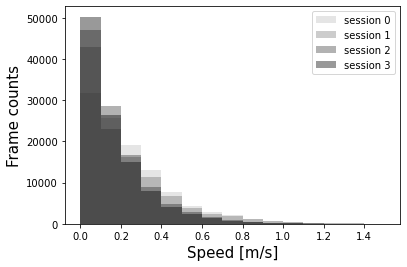

In [5]:
for i in range(4):
    plt.hist(vestibular_perturbation.dataset_list[i].speed, bins = 15, range = (0, 1.5), alpha = 0.1*i+0.1, color = 'k' , label = f'session {i}')
plt.legend()
plt.xlabel('Speed [m/s]', fontsize = 15)
plt.ylabel('Frame counts', fontsize = 15)

In [6]:
for i, dist in enumerate(vestibular_perturbation.distance_per_session):
    print(f'For session {i}, total distance the rat traveled is: {dist} [m]')

For session 0, total distance the rat traveled is: 406.539876868973 [m]
For session 1, total distance the rat traveled is: 357.50296525078267 [m]
For session 2, total distance the rat traveled is: 306.11035818640687 [m]
For session 3, total distance the rat traveled is: 276.09457077078093 [m]


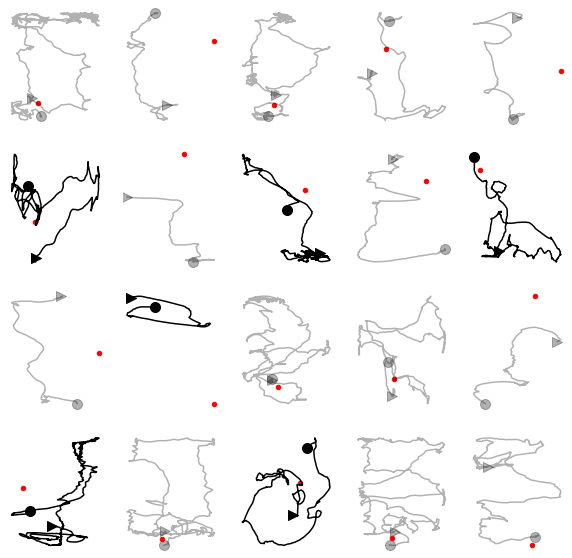

In [17]:
## Visible trials are in gray and invisible trials are in black
fig=plt.figure(figsize = (10,10))
session_no = 3
for k,t in enumerate(vestibular_perturbation.trial_list[session_no][1:]):
    plt.subplot(4,5, k+1)
    if not vestibular_perturbation.trial_visible[session_no][k]:
        alpha = 1
    else:
        alpha = 0.3
    plt.plot(t[:,1], t[:,2], color = 'k', alpha = alpha)
    plt.scatter(t[0,1], t[0,2], c = 'k', marker = 'o', s = 100, alpha = alpha)
    plt.scatter(t[-1,1], t[-1,2], c= 'k', marker = '>', s = 100, alpha = alpha)
    plt.scatter(vestibular_perturbation.beacon_list[session_no][k,0], vestibular_perturbation.beacon_list[session_no][k,1], c = 'red', s = 20)
    plt.axis('off')
    if k+1 == 20:
        break
            

In [24]:
session_no = 0
trial_no =3
straightness_moment = path_analysis.straightness_moment_time(vestibular_perturbation.trial_list[session_no][trial_no][:,:3], before_time=2)
straightness_time = path_analysis.straightness_over_time(vestibular_perturbation.trial_list[session_no][trial_no][:,:3], before_time=2)

Ratio: 0.3522788120584097


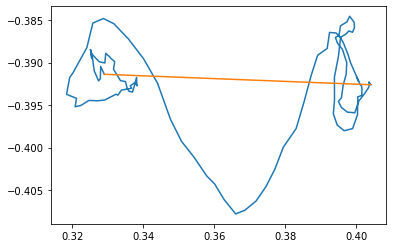

In [25]:
plt.plot(straightness_moment[2][:,0], straightness_moment[2][:,1])
plt.plot(straightness_moment[1][:,0], straightness_moment[1][:,1])
print(f'Ratio: {straightness_moment[0]}')

Invisible trial straightness is red, visible trials are in gray


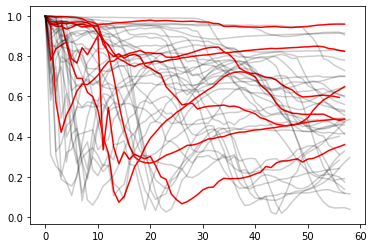

In [28]:
session_num = 3
for i in range(len(vestibular_perturbation.trial_list[session_num])):
    straightness_moment = path_analysis.straightness_moment_time(vestibular_perturbation.trial_list[session_num][i][:,:3], before_time=1)
    straightness_time = path_analysis.straightness_over_time(vestibular_perturbation.trial_list[session_num][i][:,:3], before_time=1)
    
    if straightness_time == None:
        print(i)
        continue
    
    if vestibular_perturbation.trial_visible[session_num][i]:
        plt.plot(straightness_time[0], c = 'k', alpha = 0.2)
    else:
        plt.plot(straightness_time[0], c='red')
    
print('Invisible trial straightness is red, visible trials are in gray')


## Rearing analysis

In [29]:
rearing_data, rearing_counts, rearing_durations, rearing_distance_beacon = vestibular_perturbation.get_rearings(threshold=0.65)

(array([25.,  6.,  4.,  3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <BarContainer object of 10 artists>)

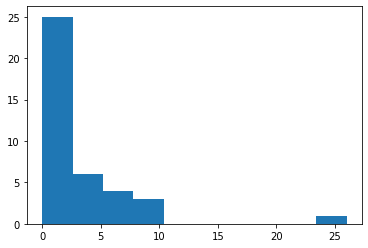

In [31]:
#Histogram of rearing counts in each trial
session_no = 3
plt.hist(rearing_counts[session_no])

Text(0.5, 0, 'Distance [m]')

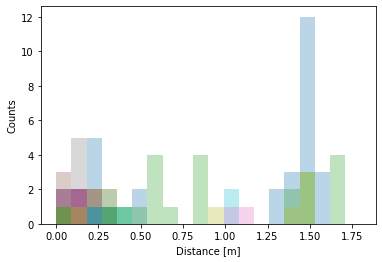

In [33]:
## Histogram of 'pure' distance from beacon at the time of rearings of during each trial(different color)
session_no = 3
for t in rearing_distance_beacon[session_no]:
    plt.hist(t, bins = 20, range = (0.0, 1.8), alpha = 0.3)
plt.ylabel('Counts')
plt.xlabel('Distance [m]')

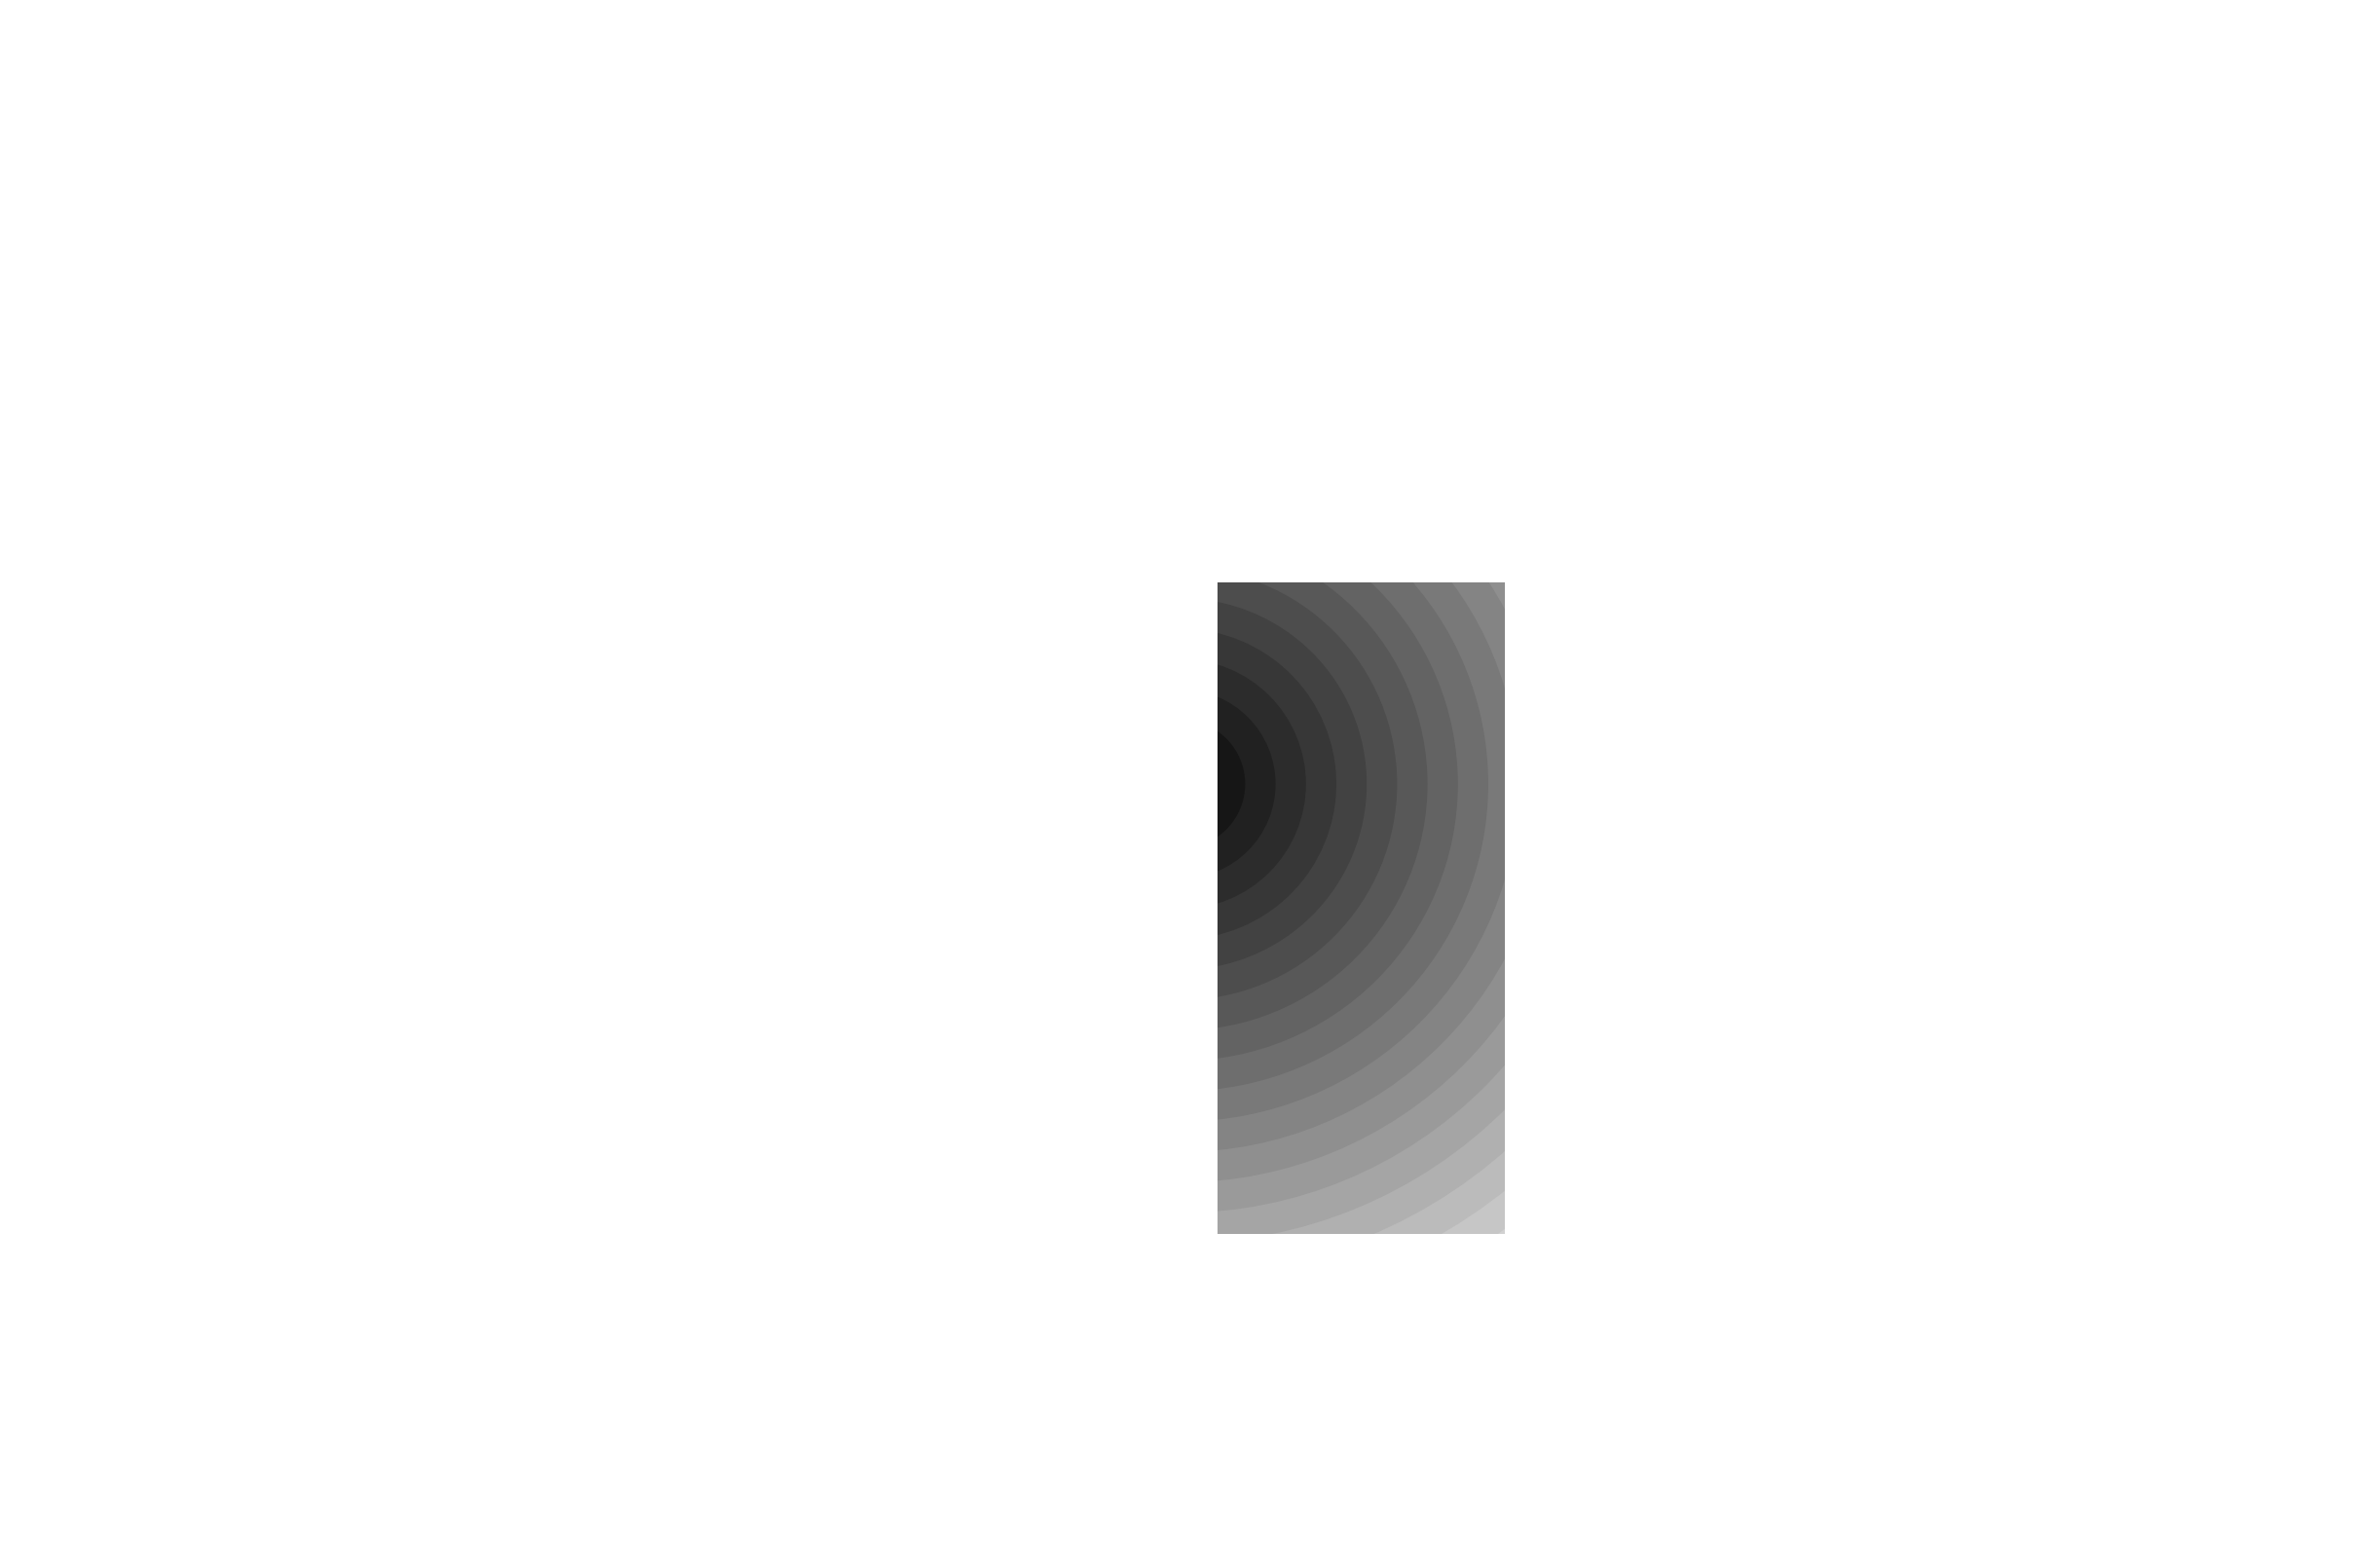

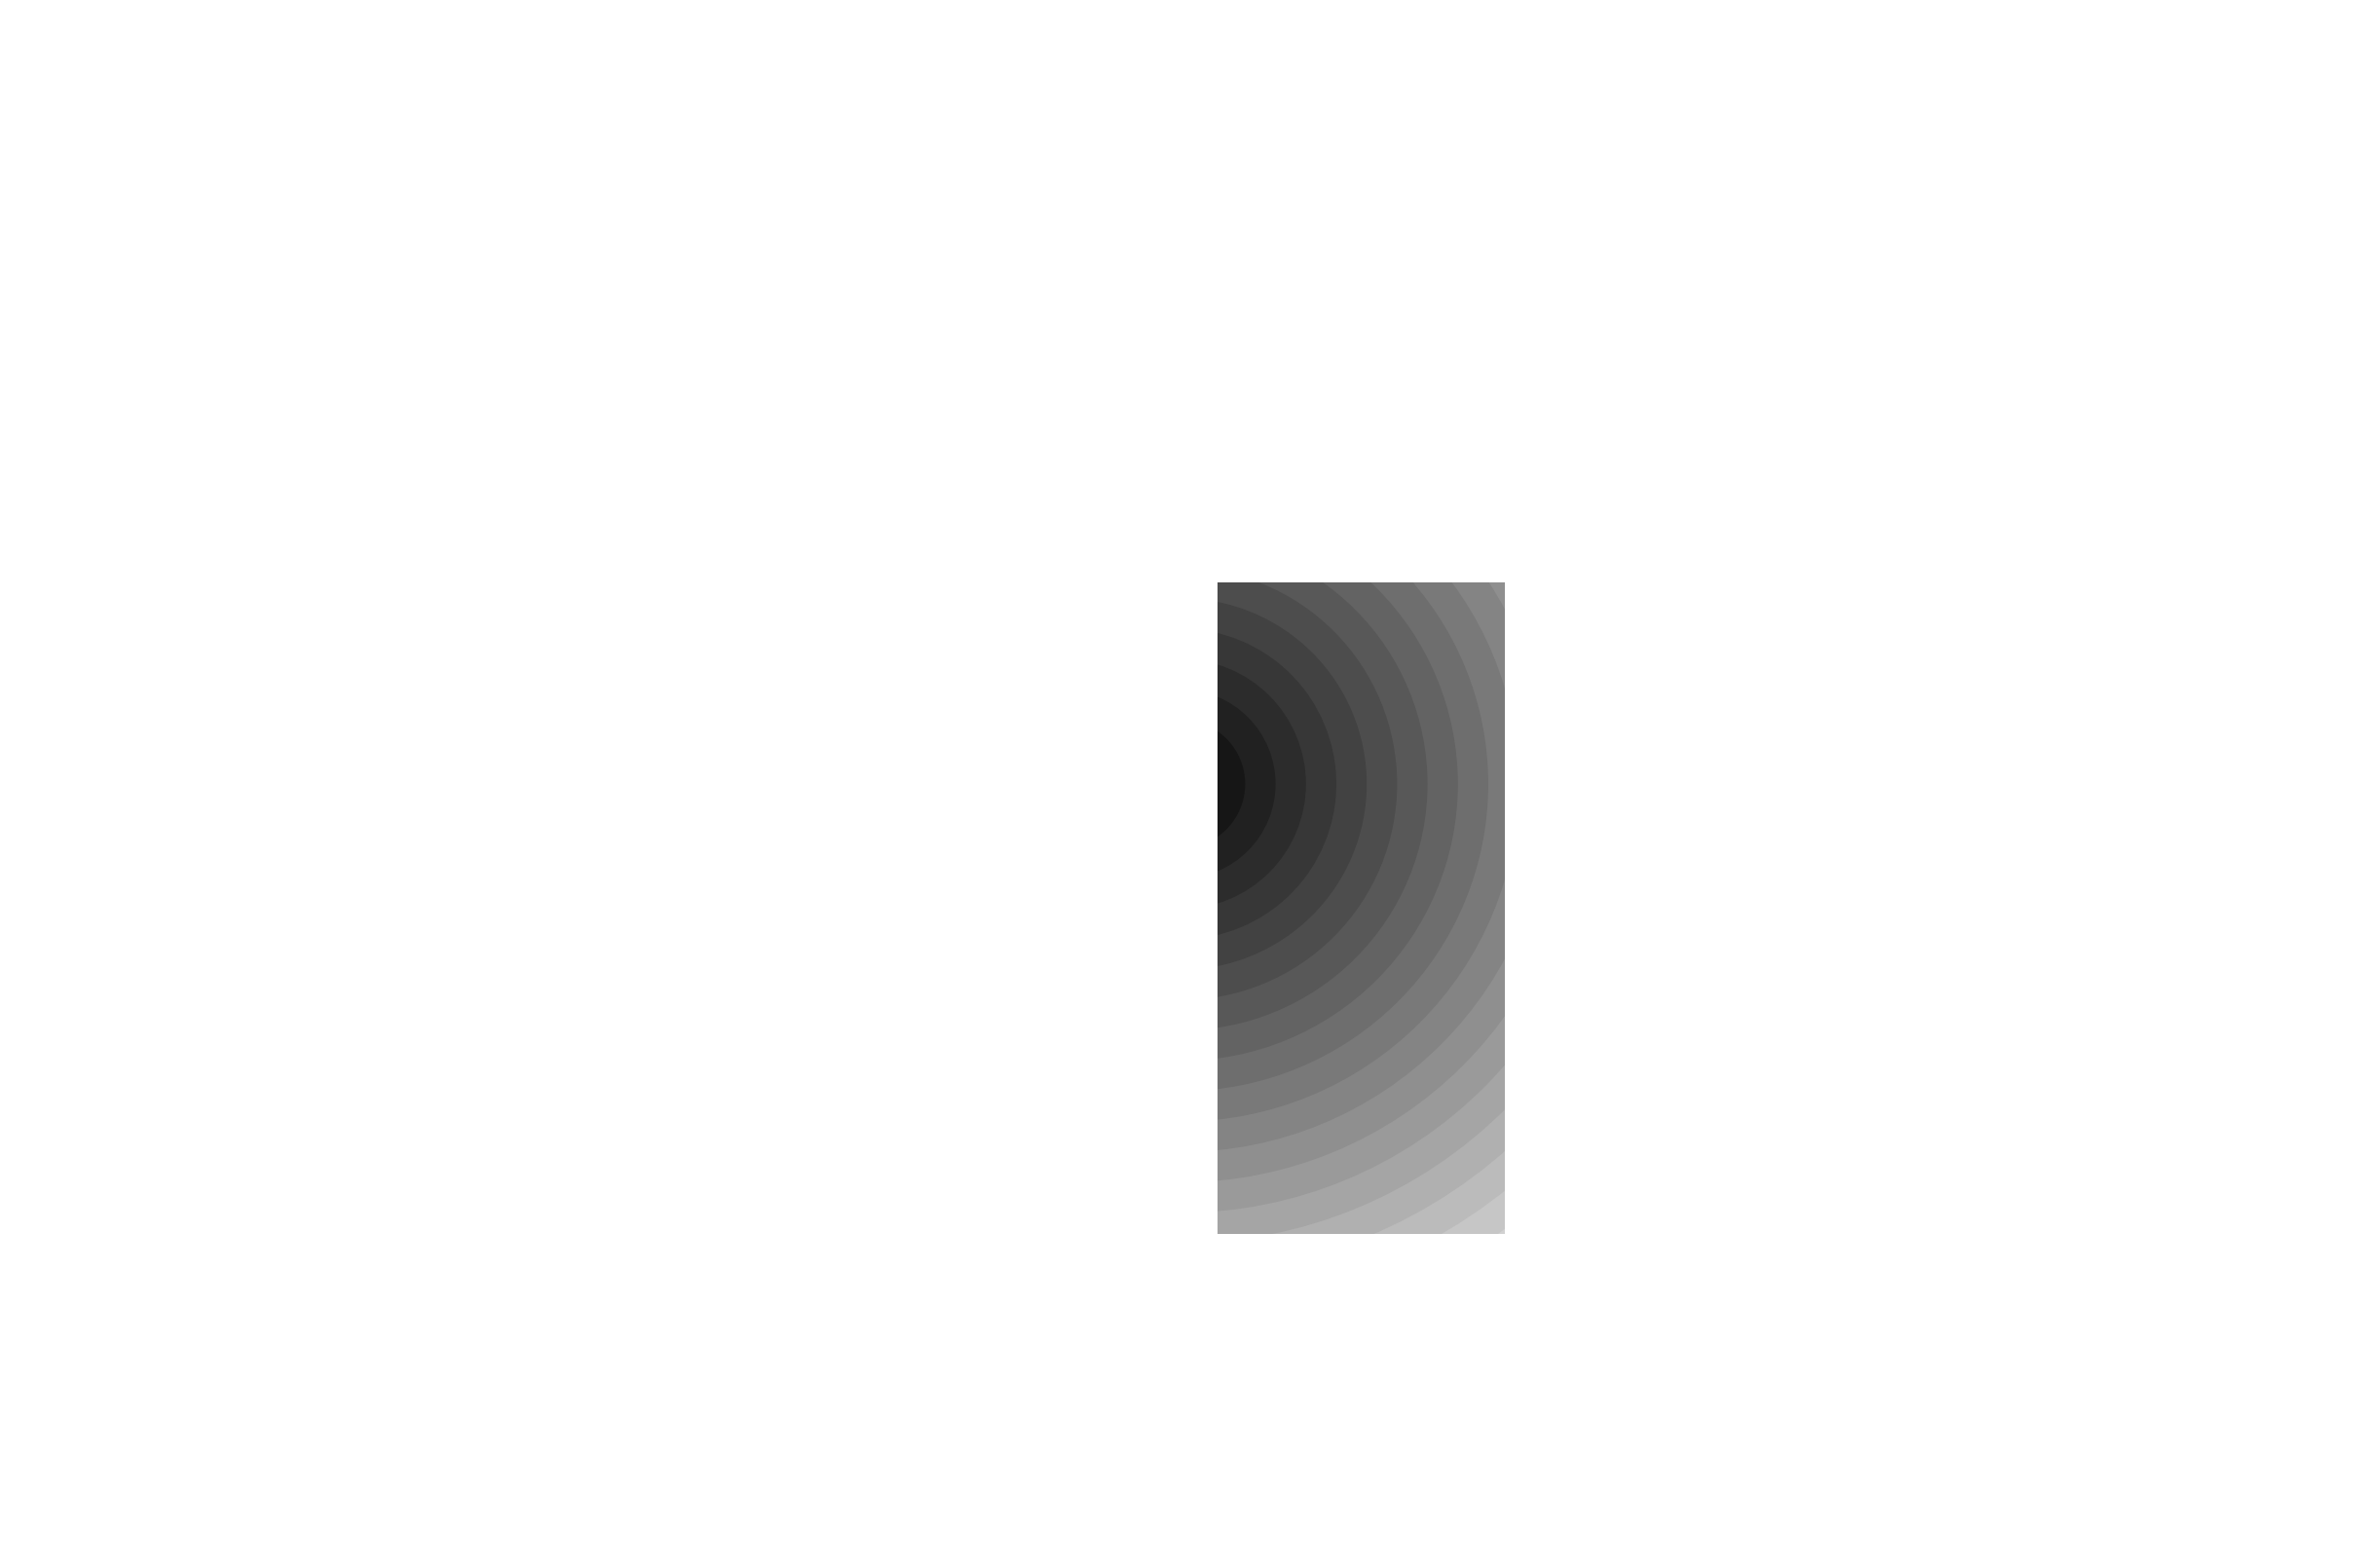

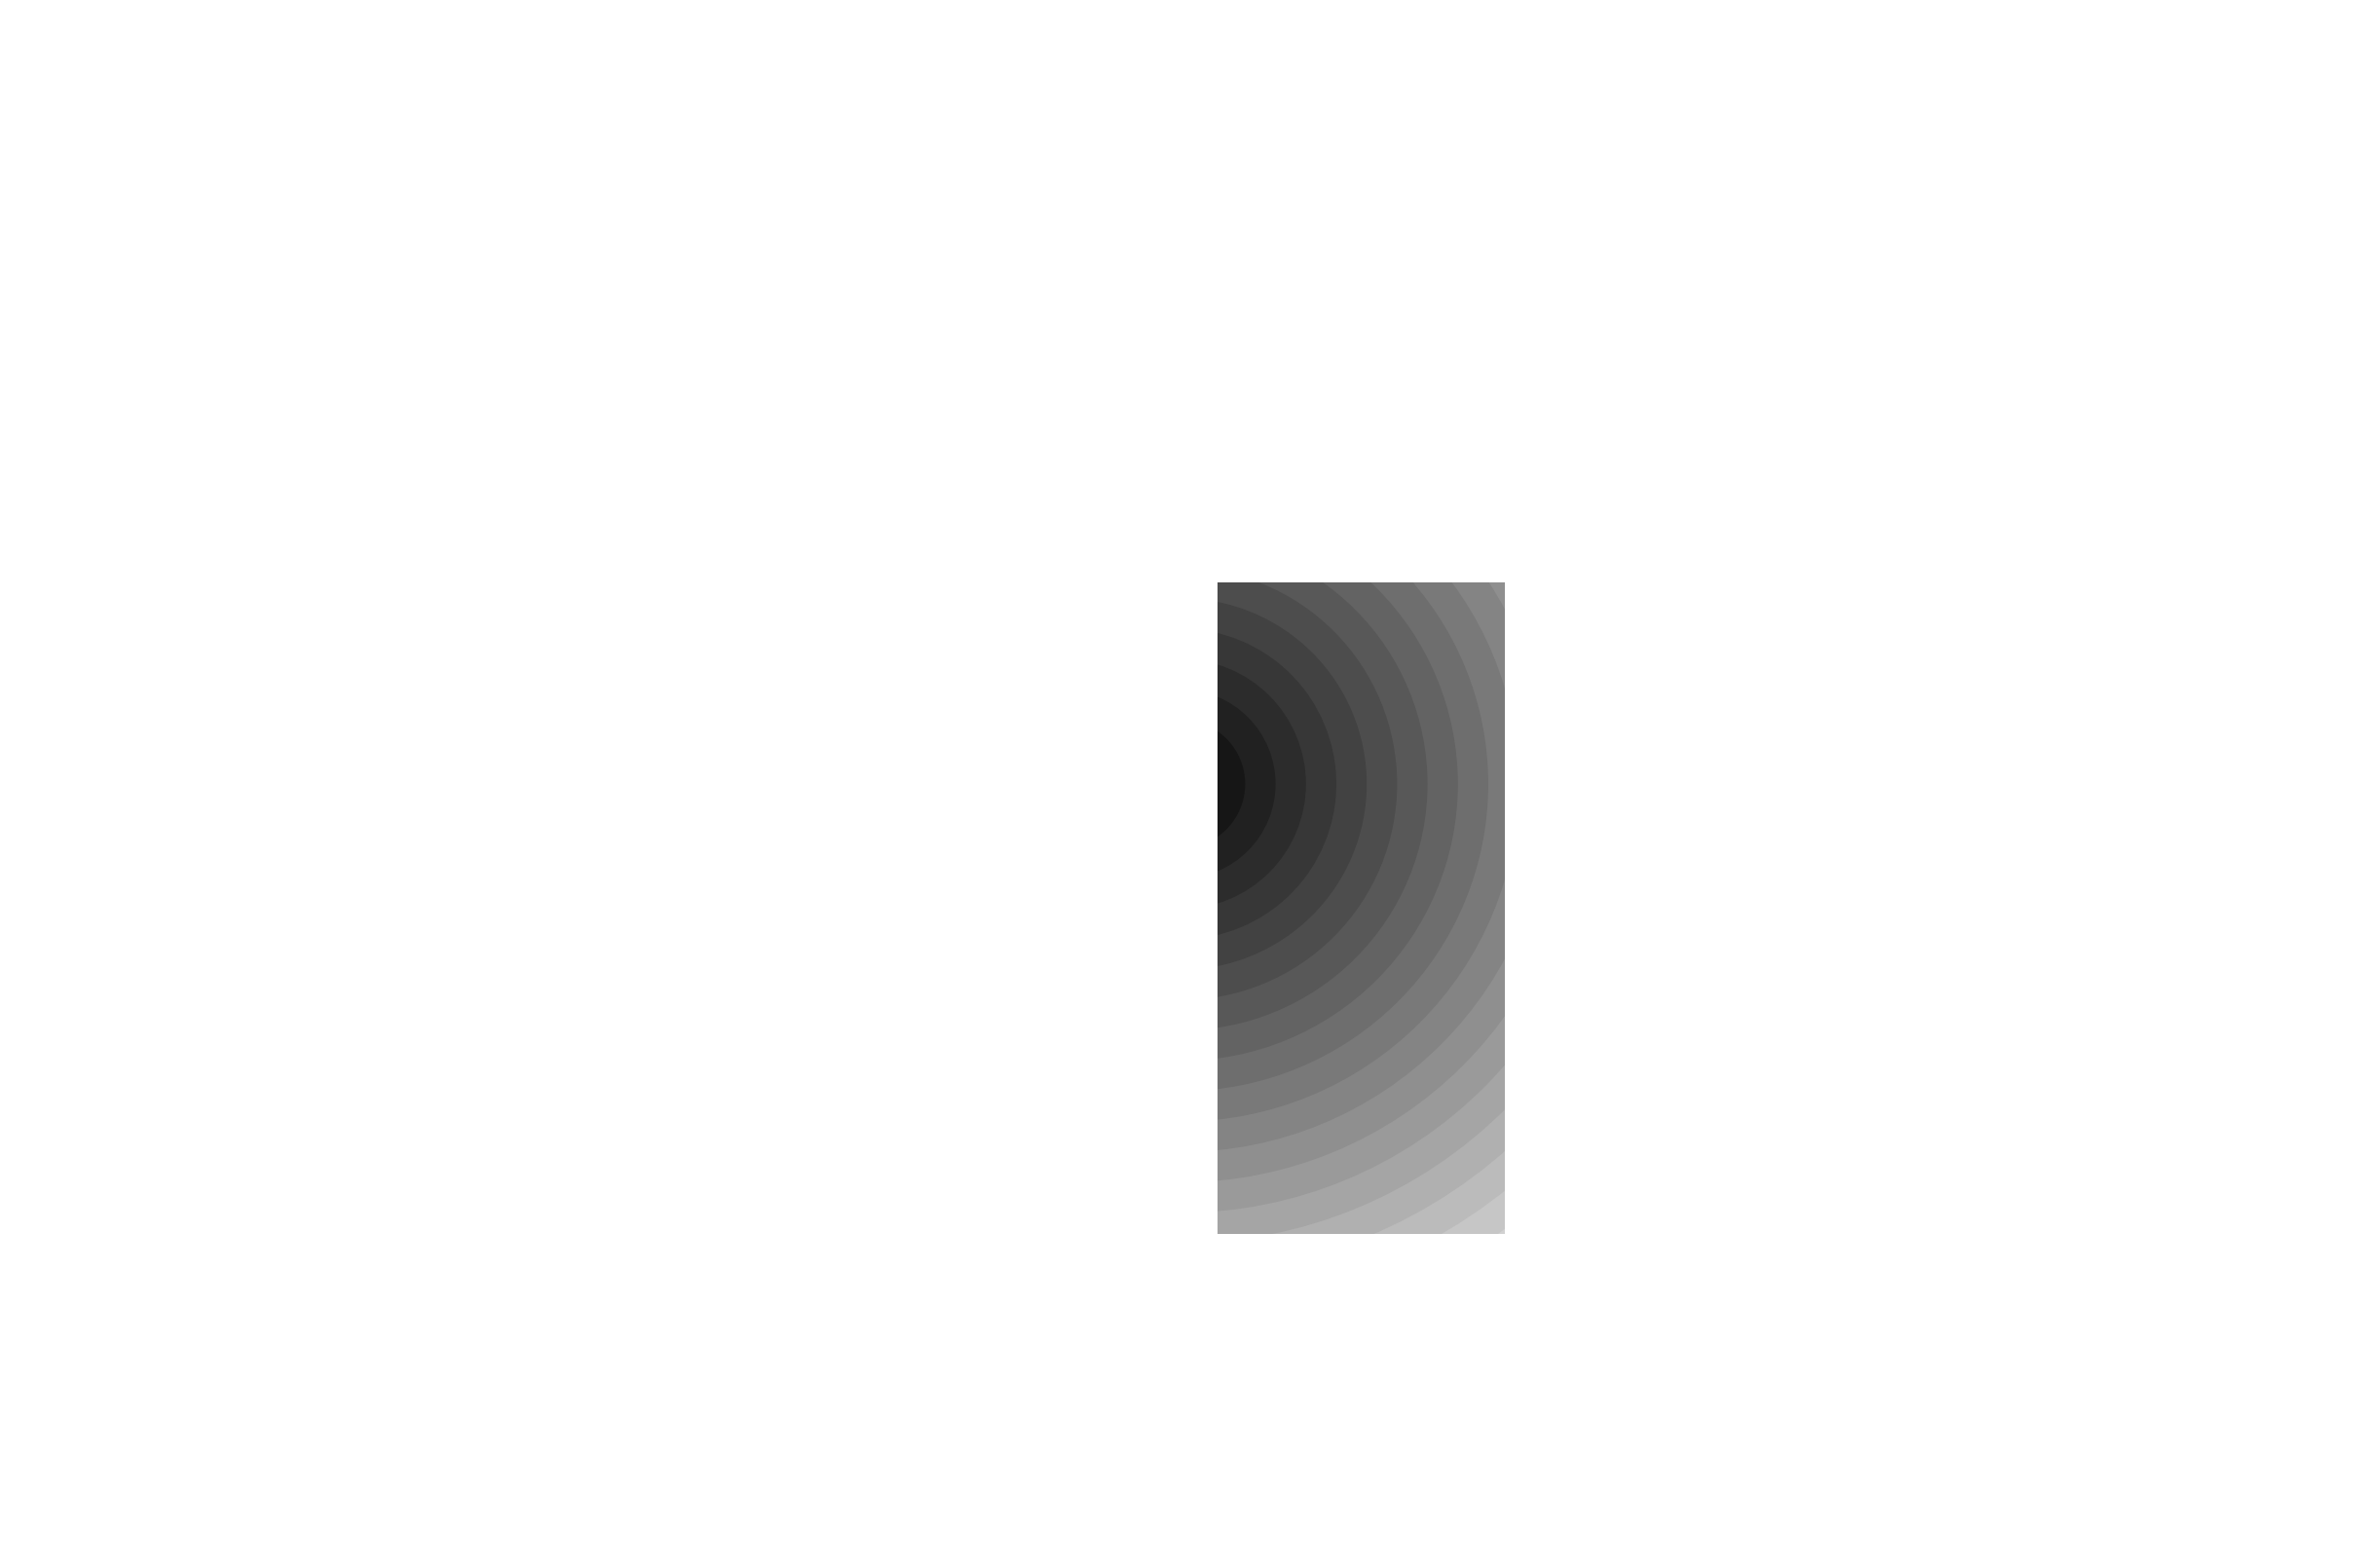

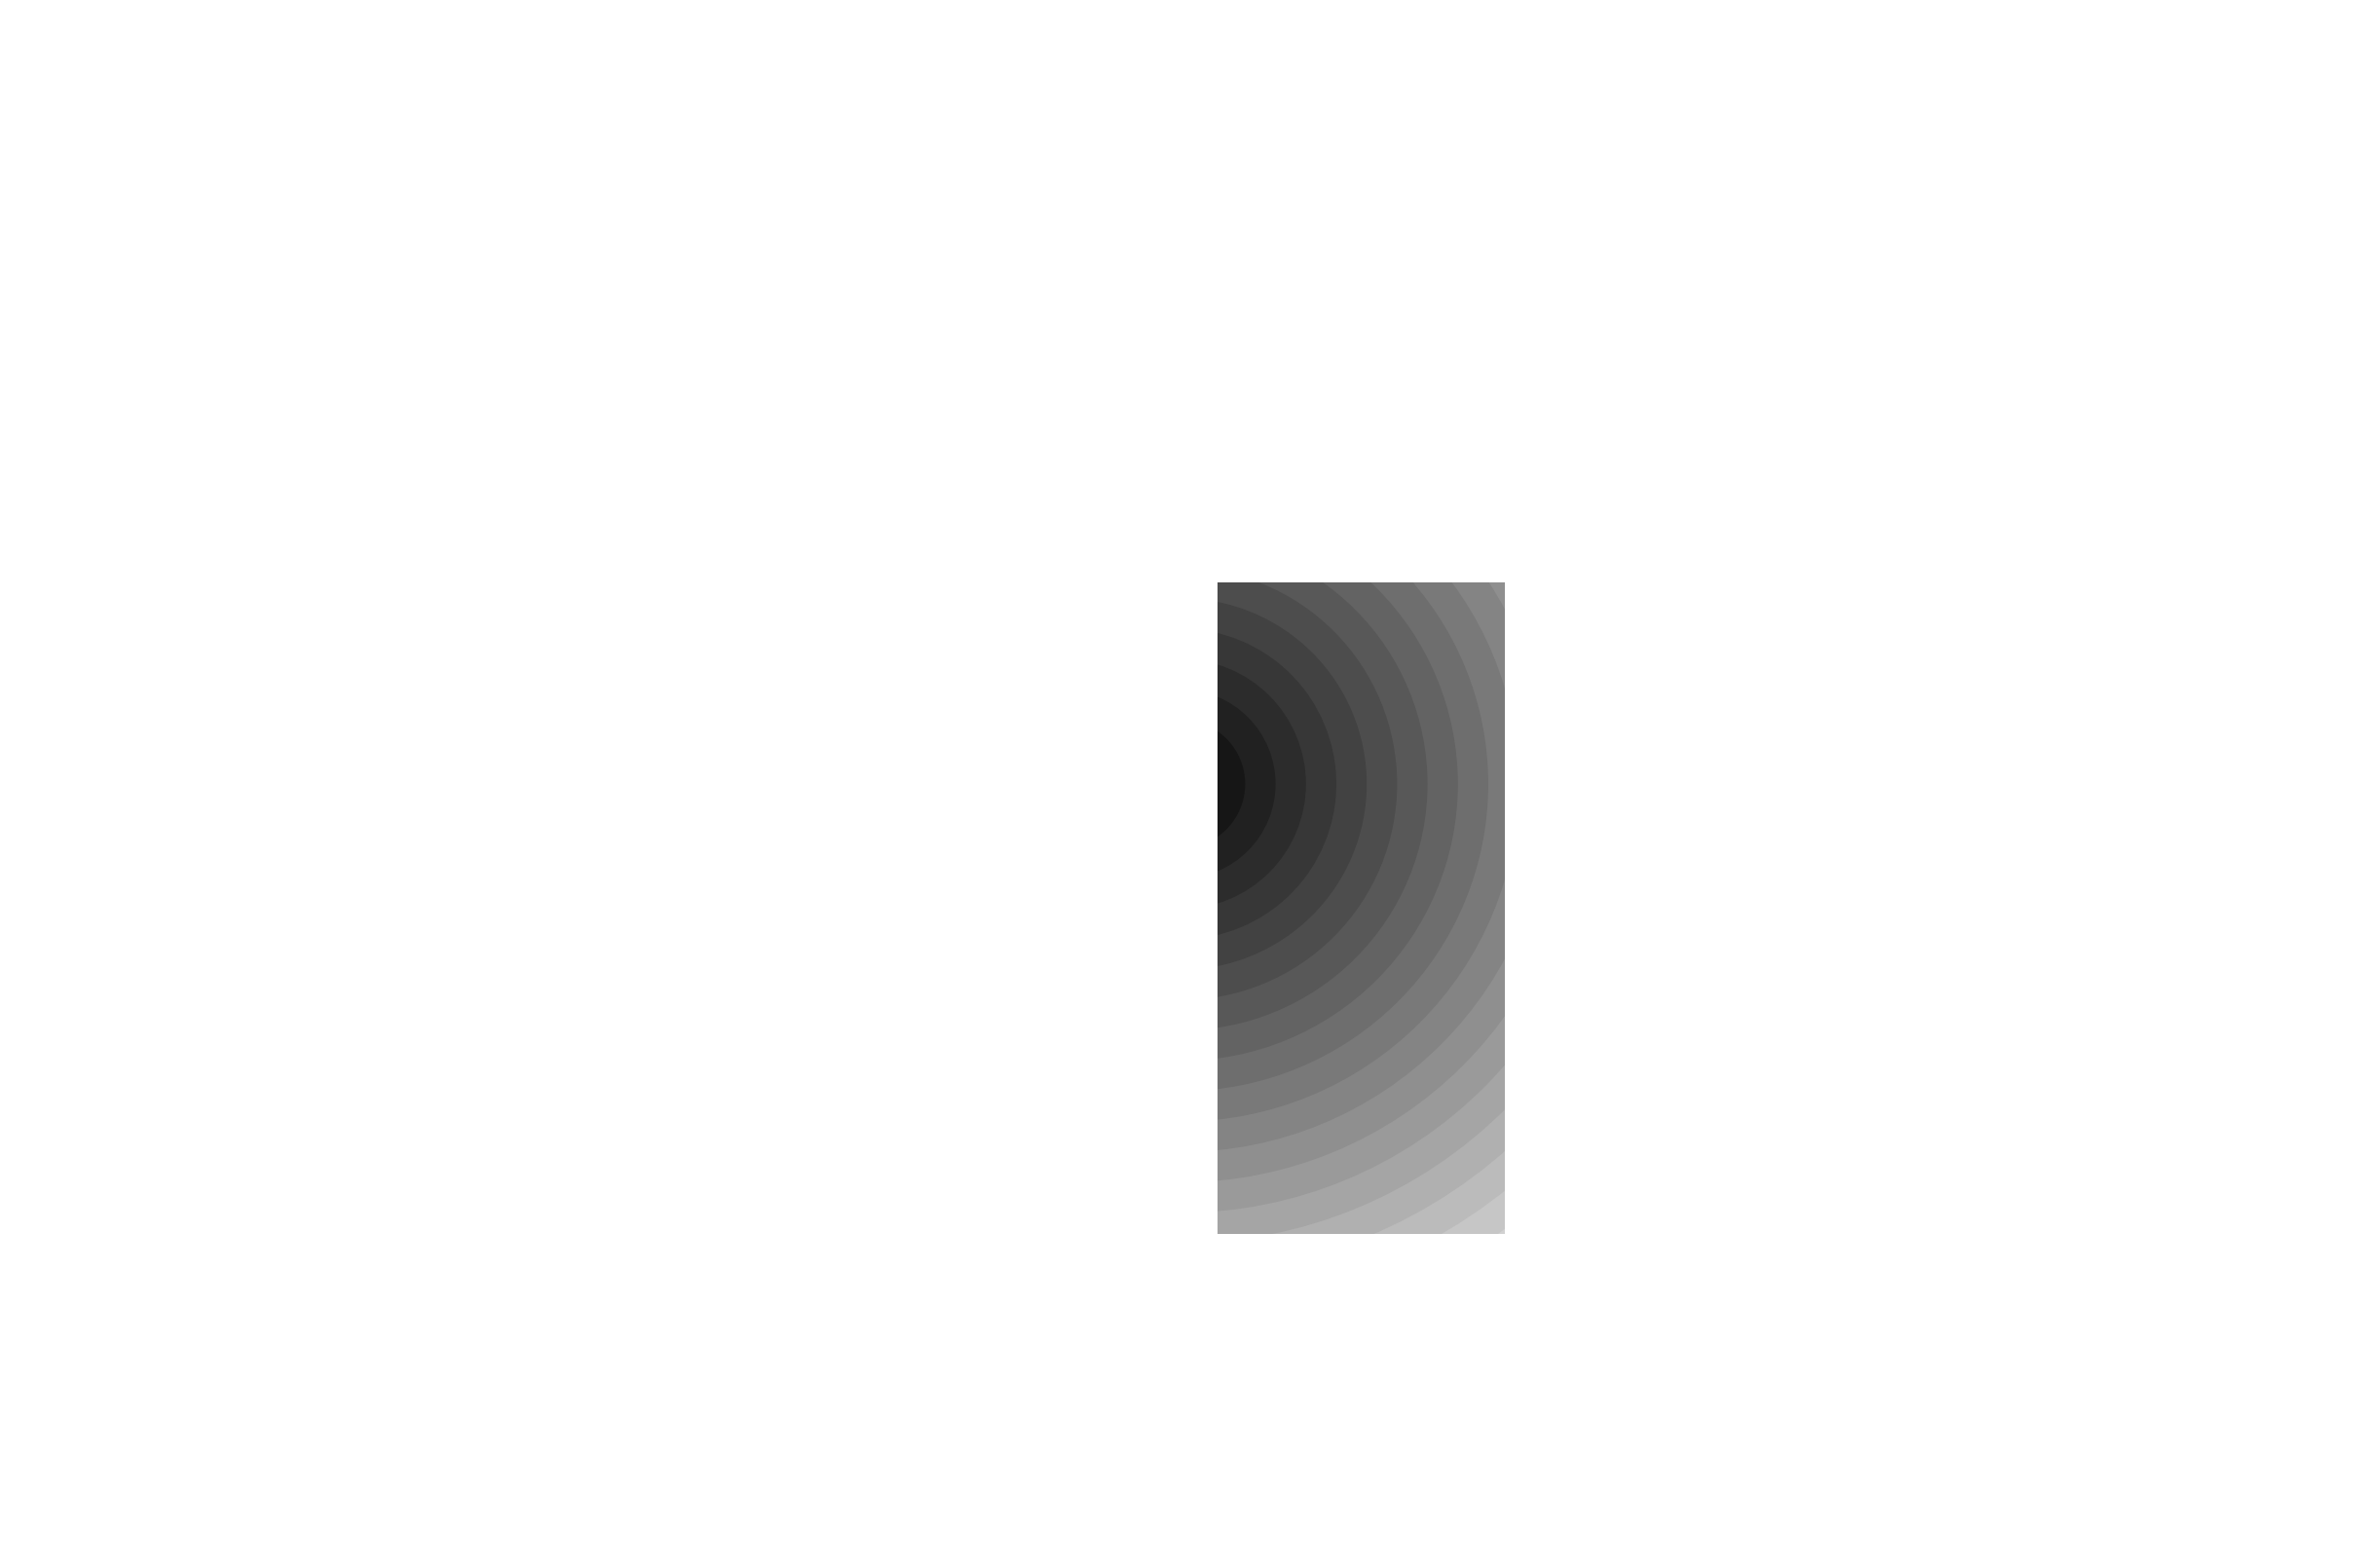

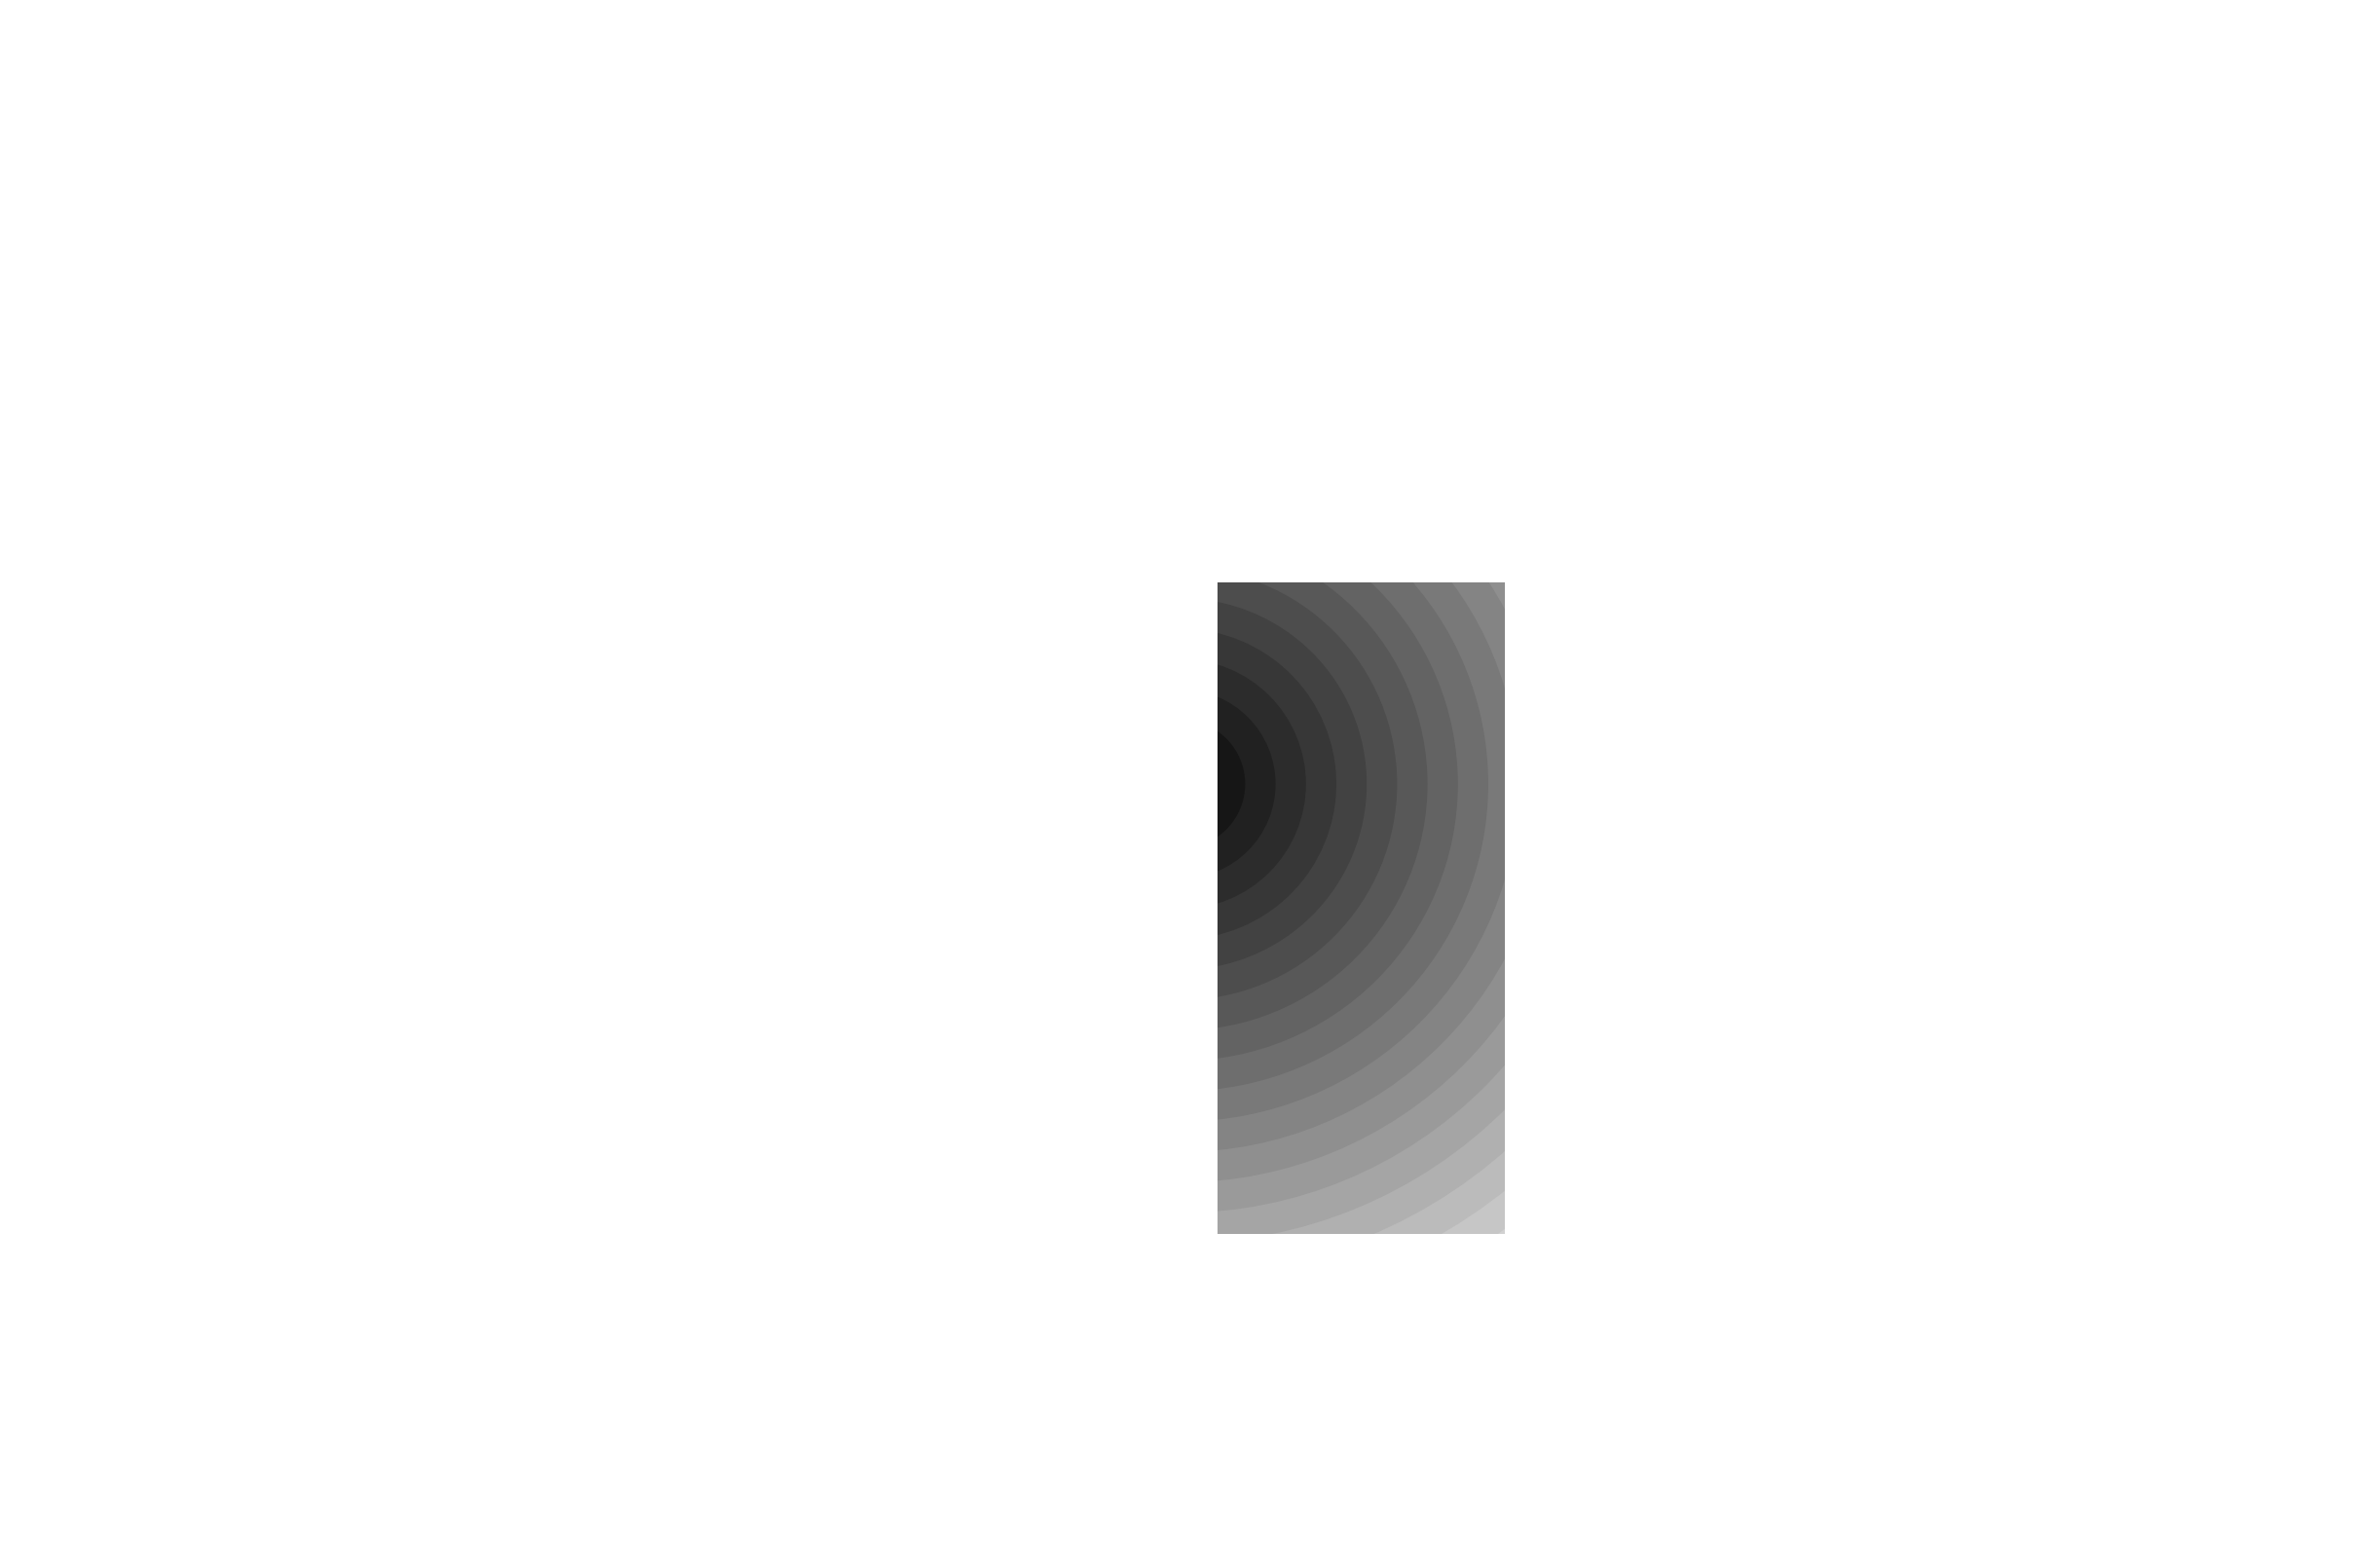

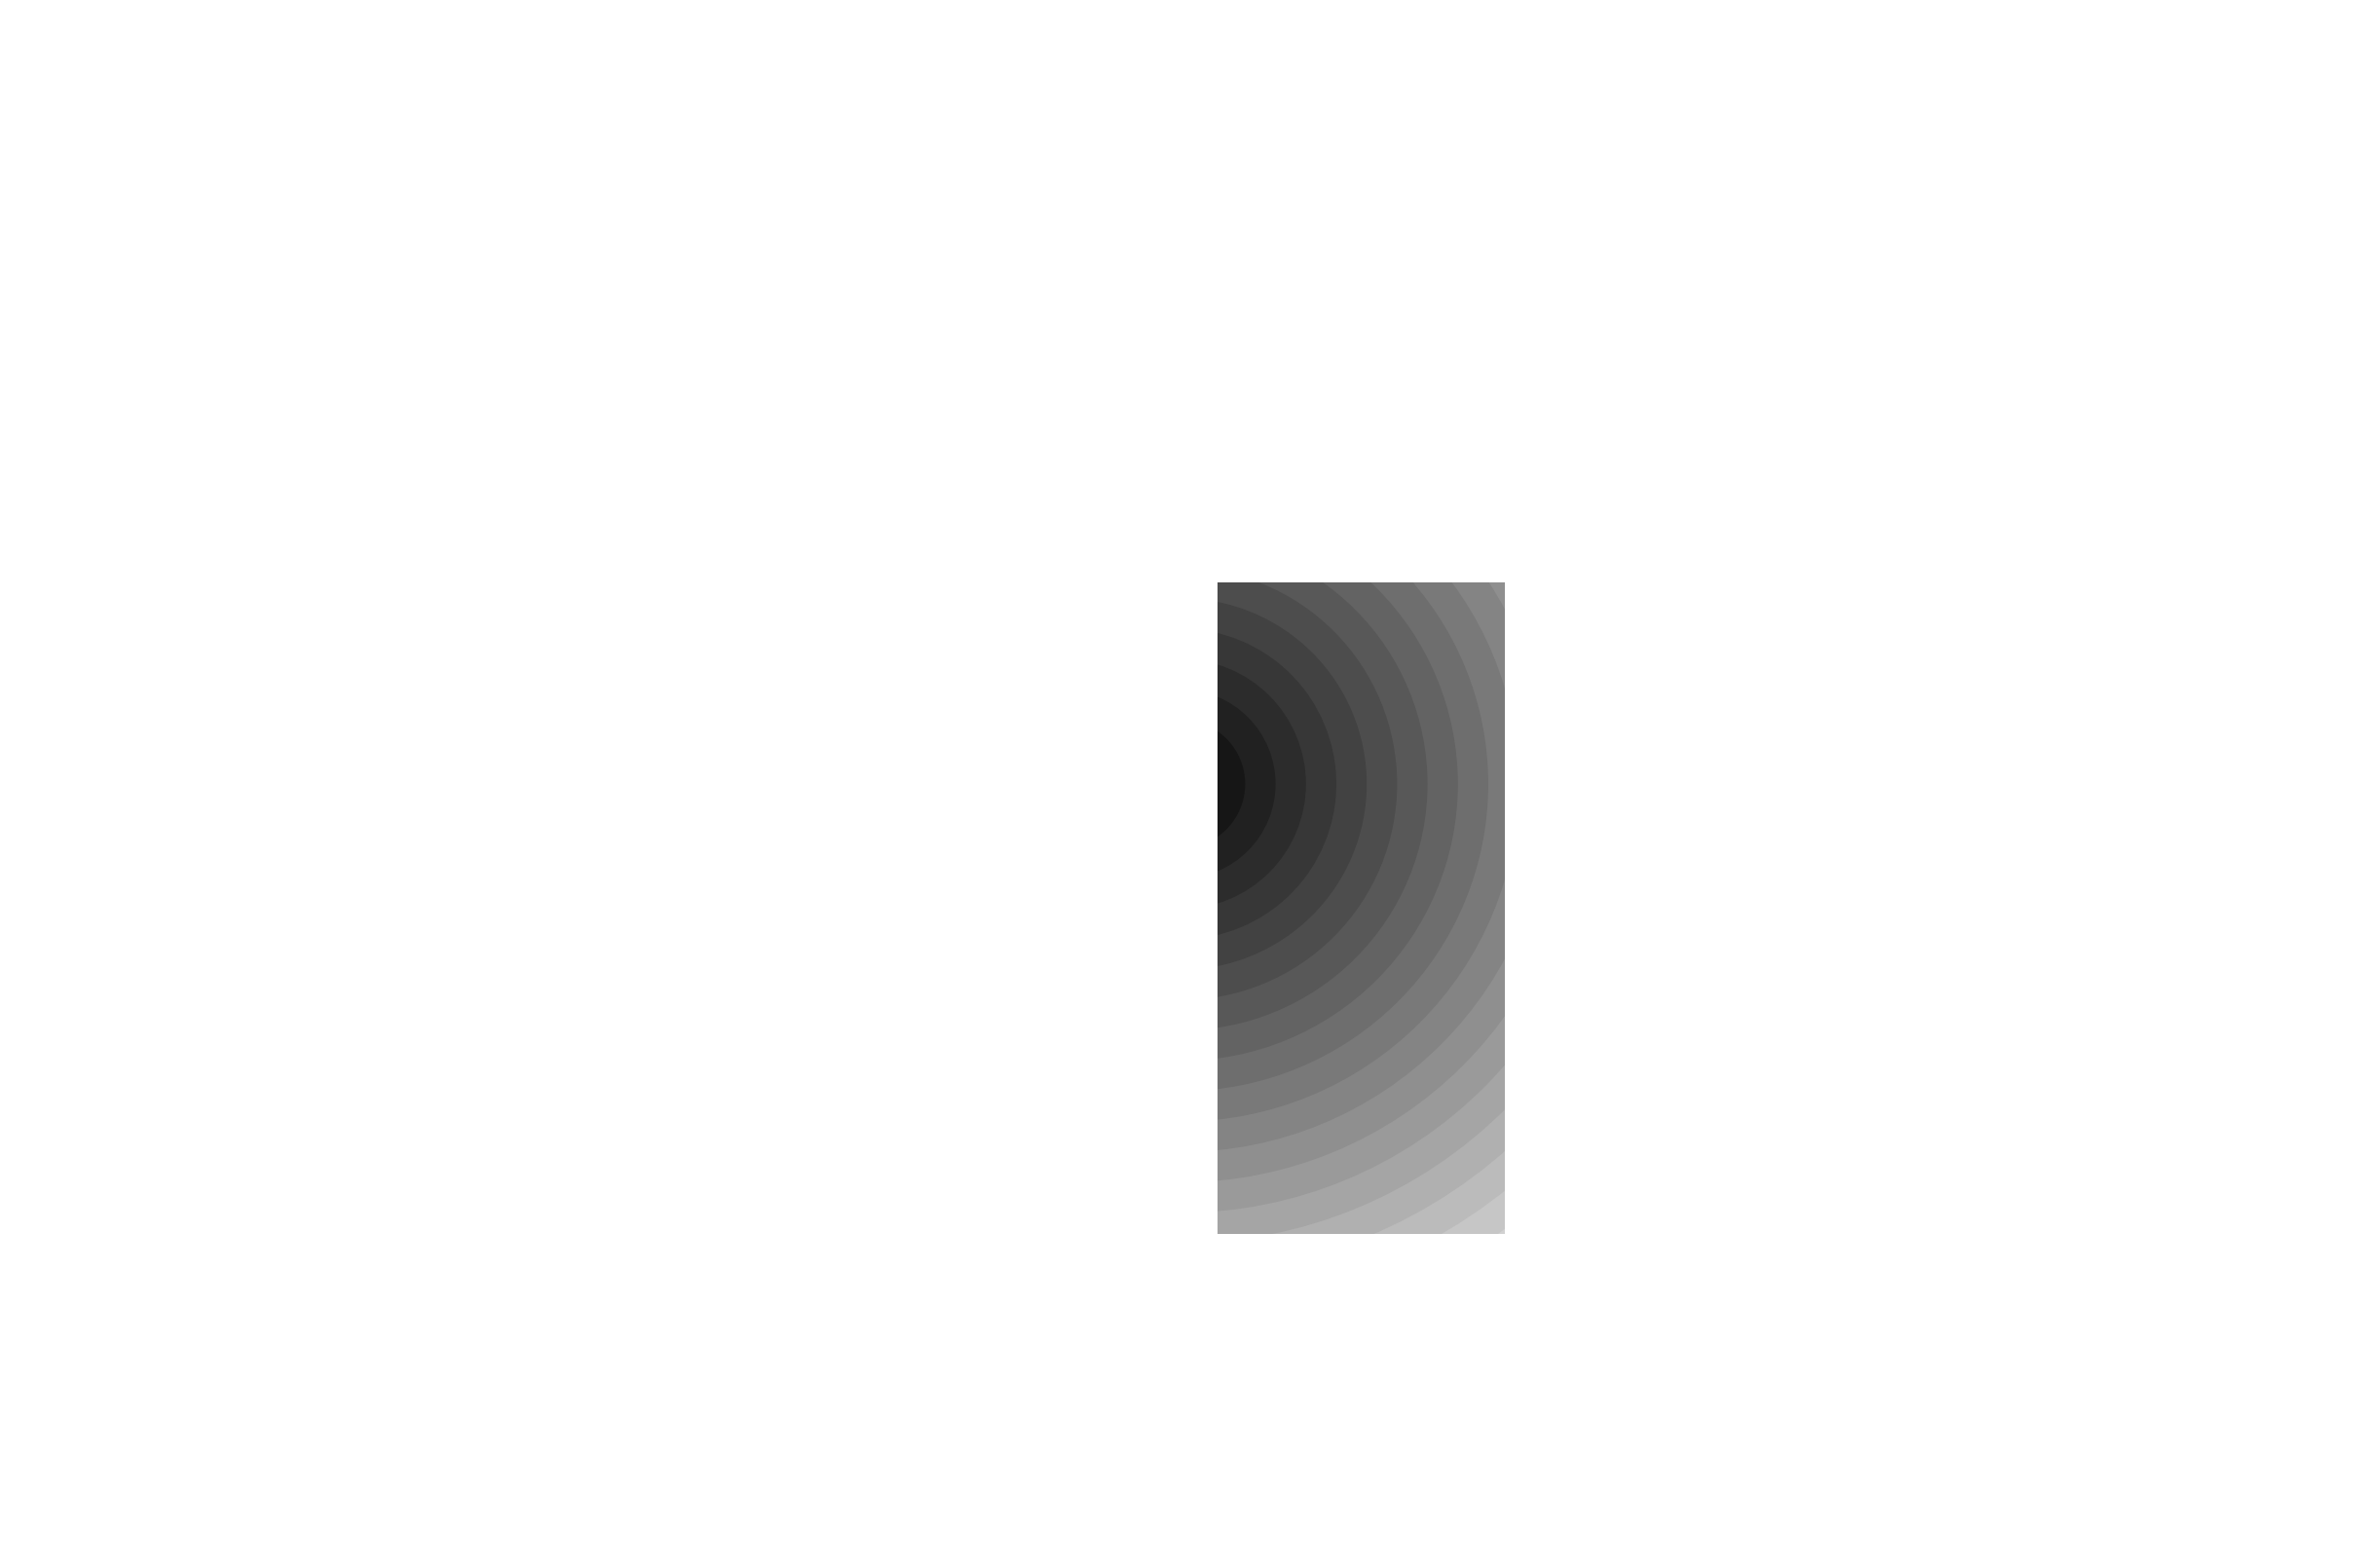

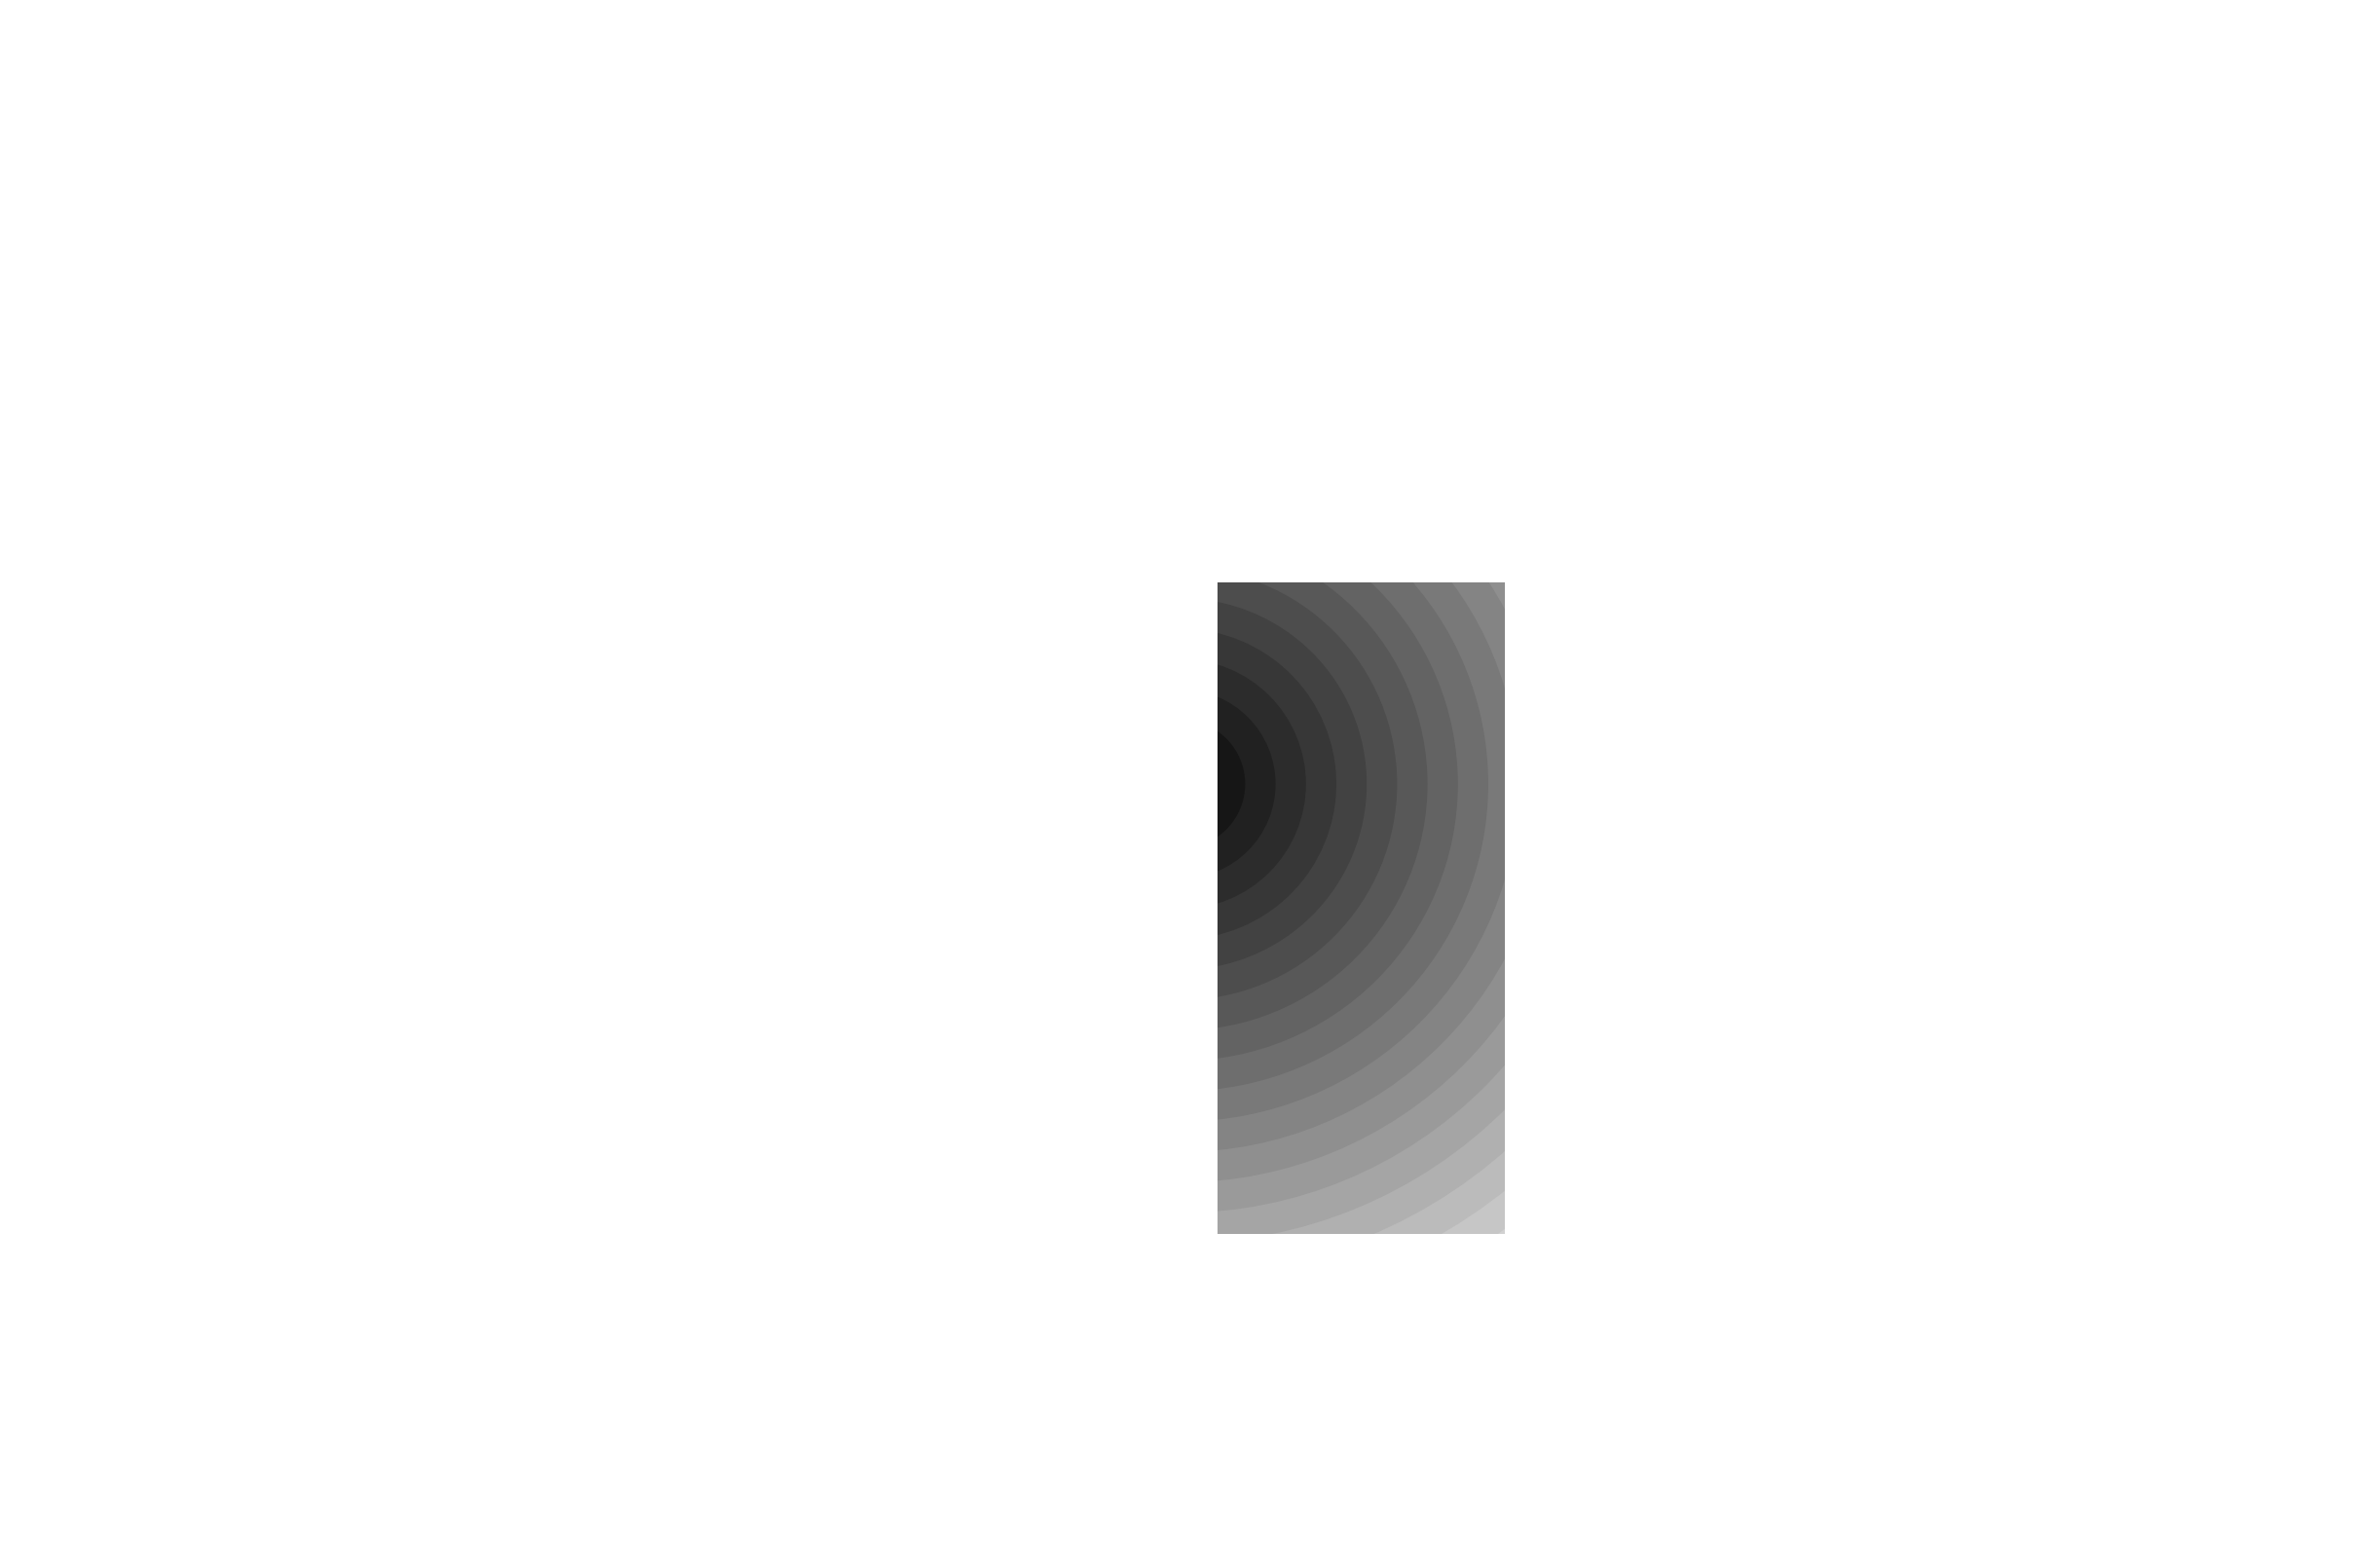

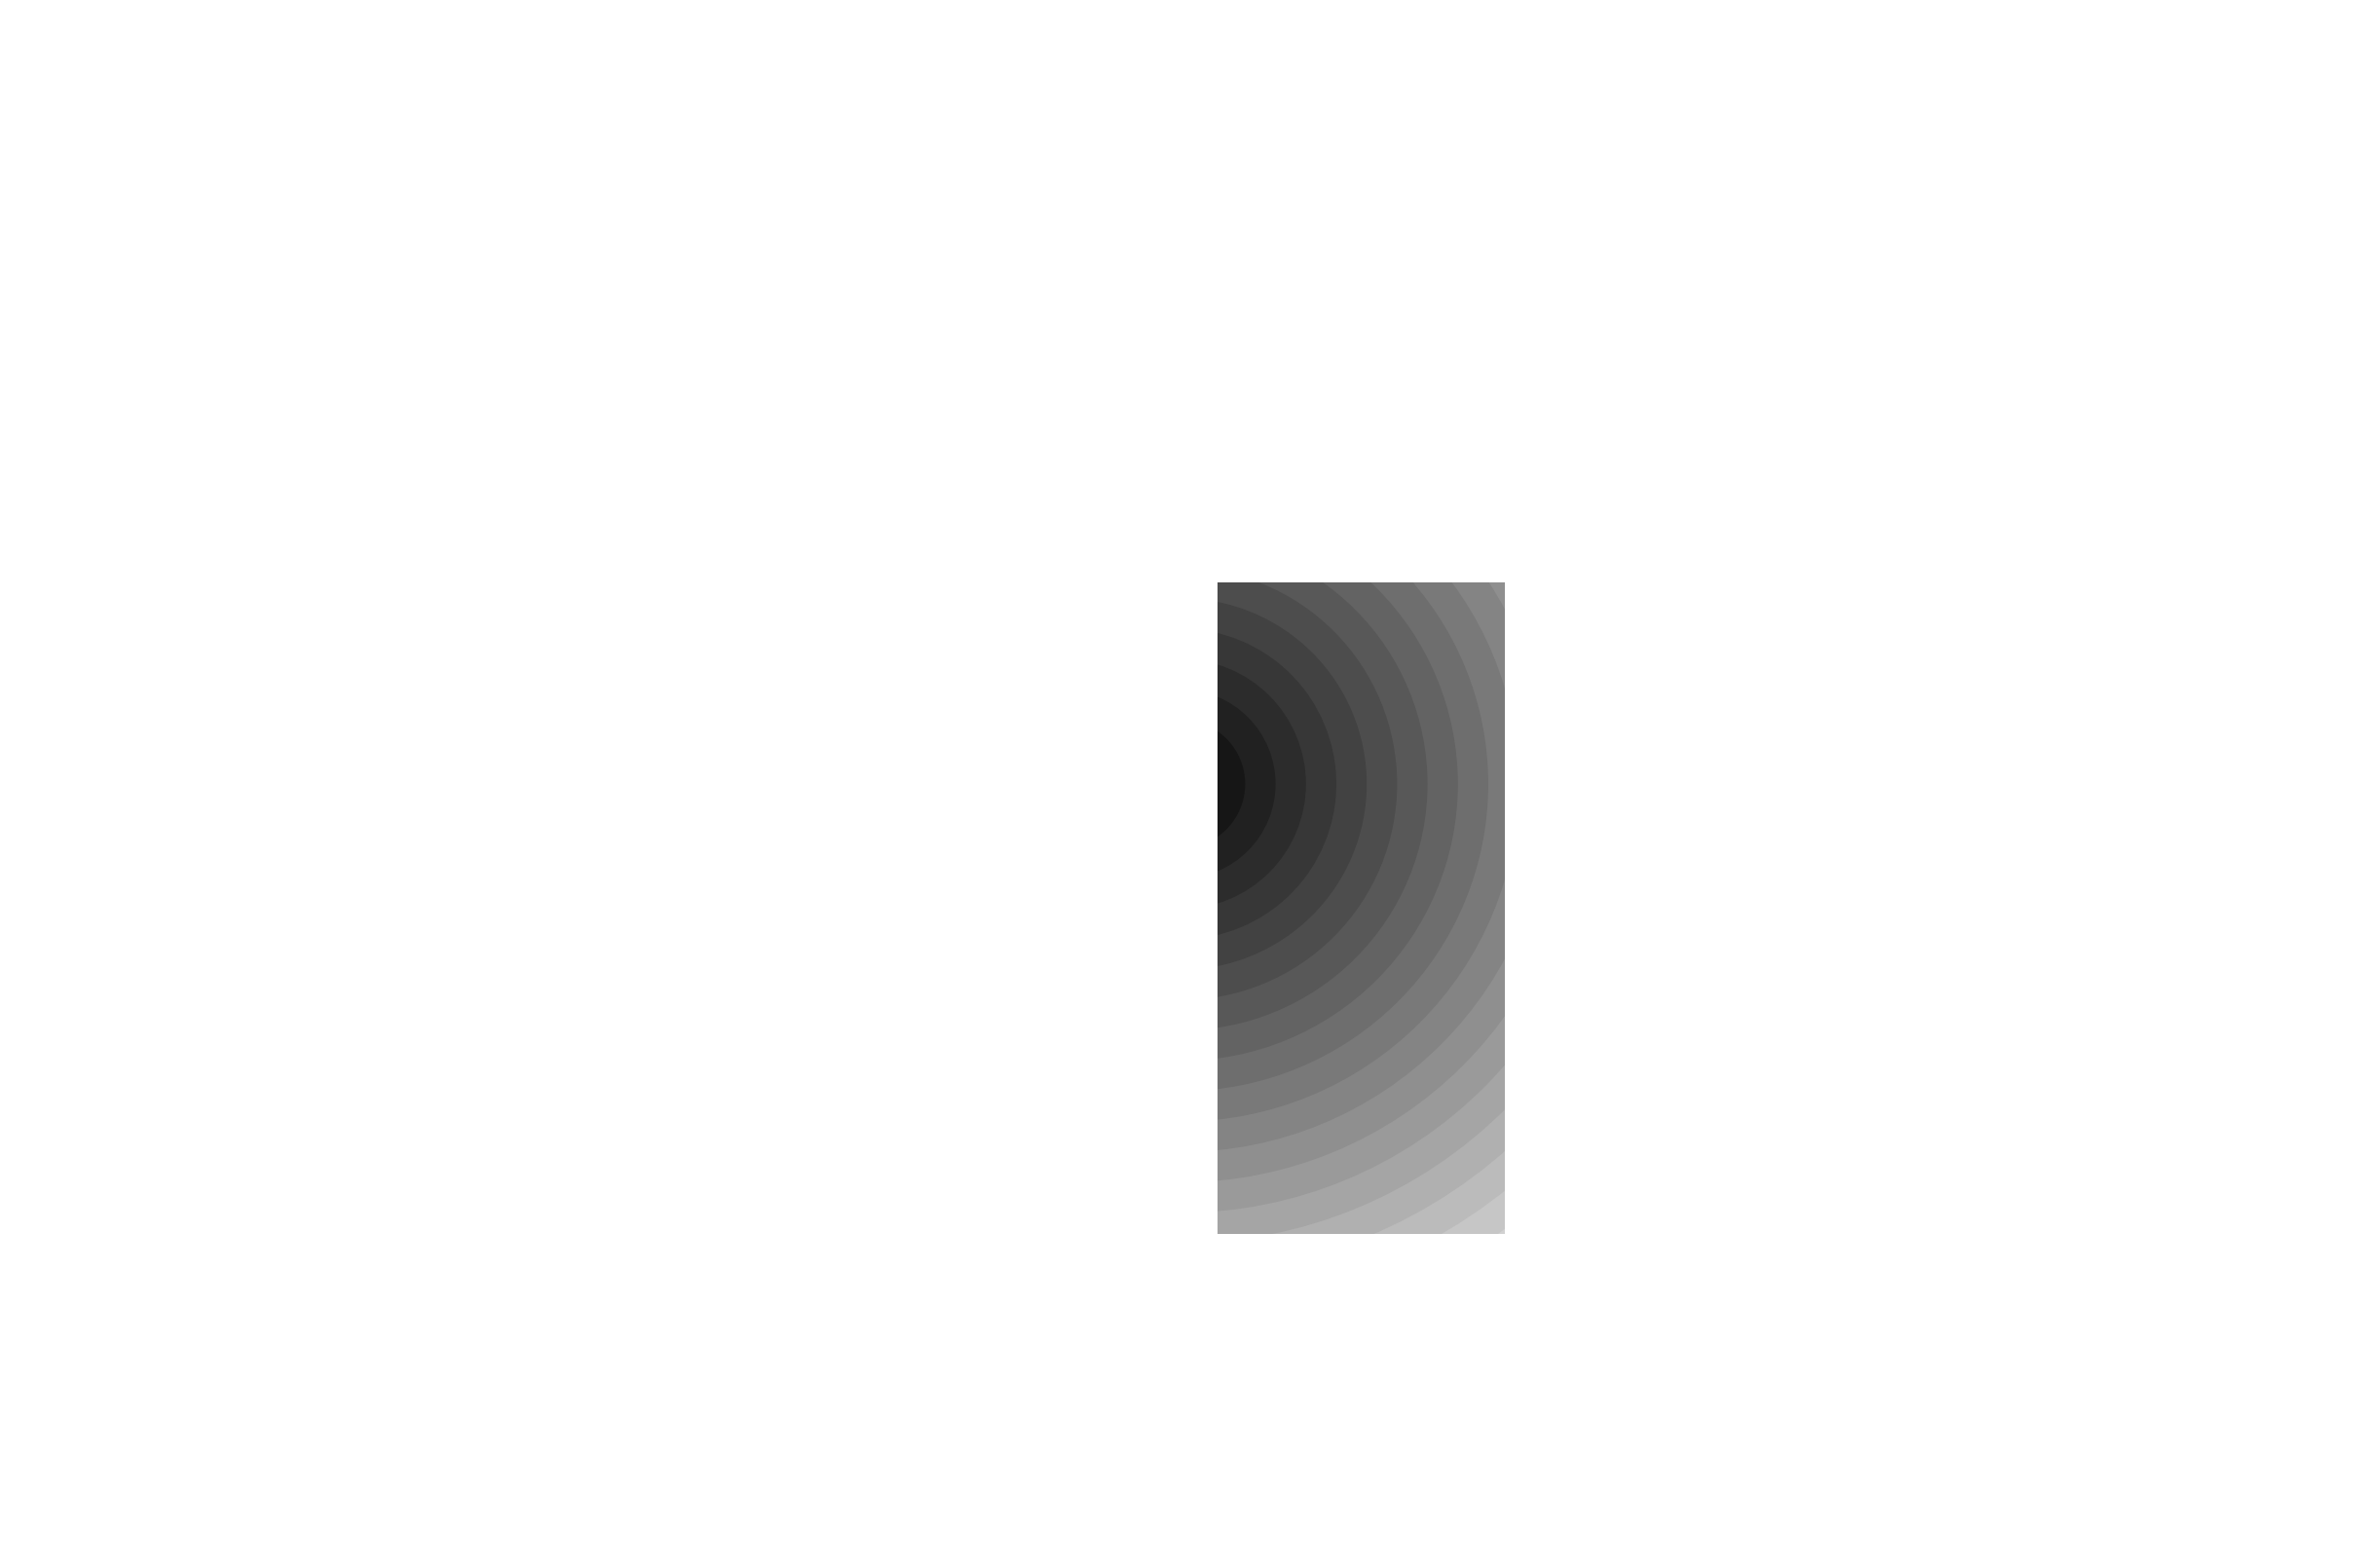

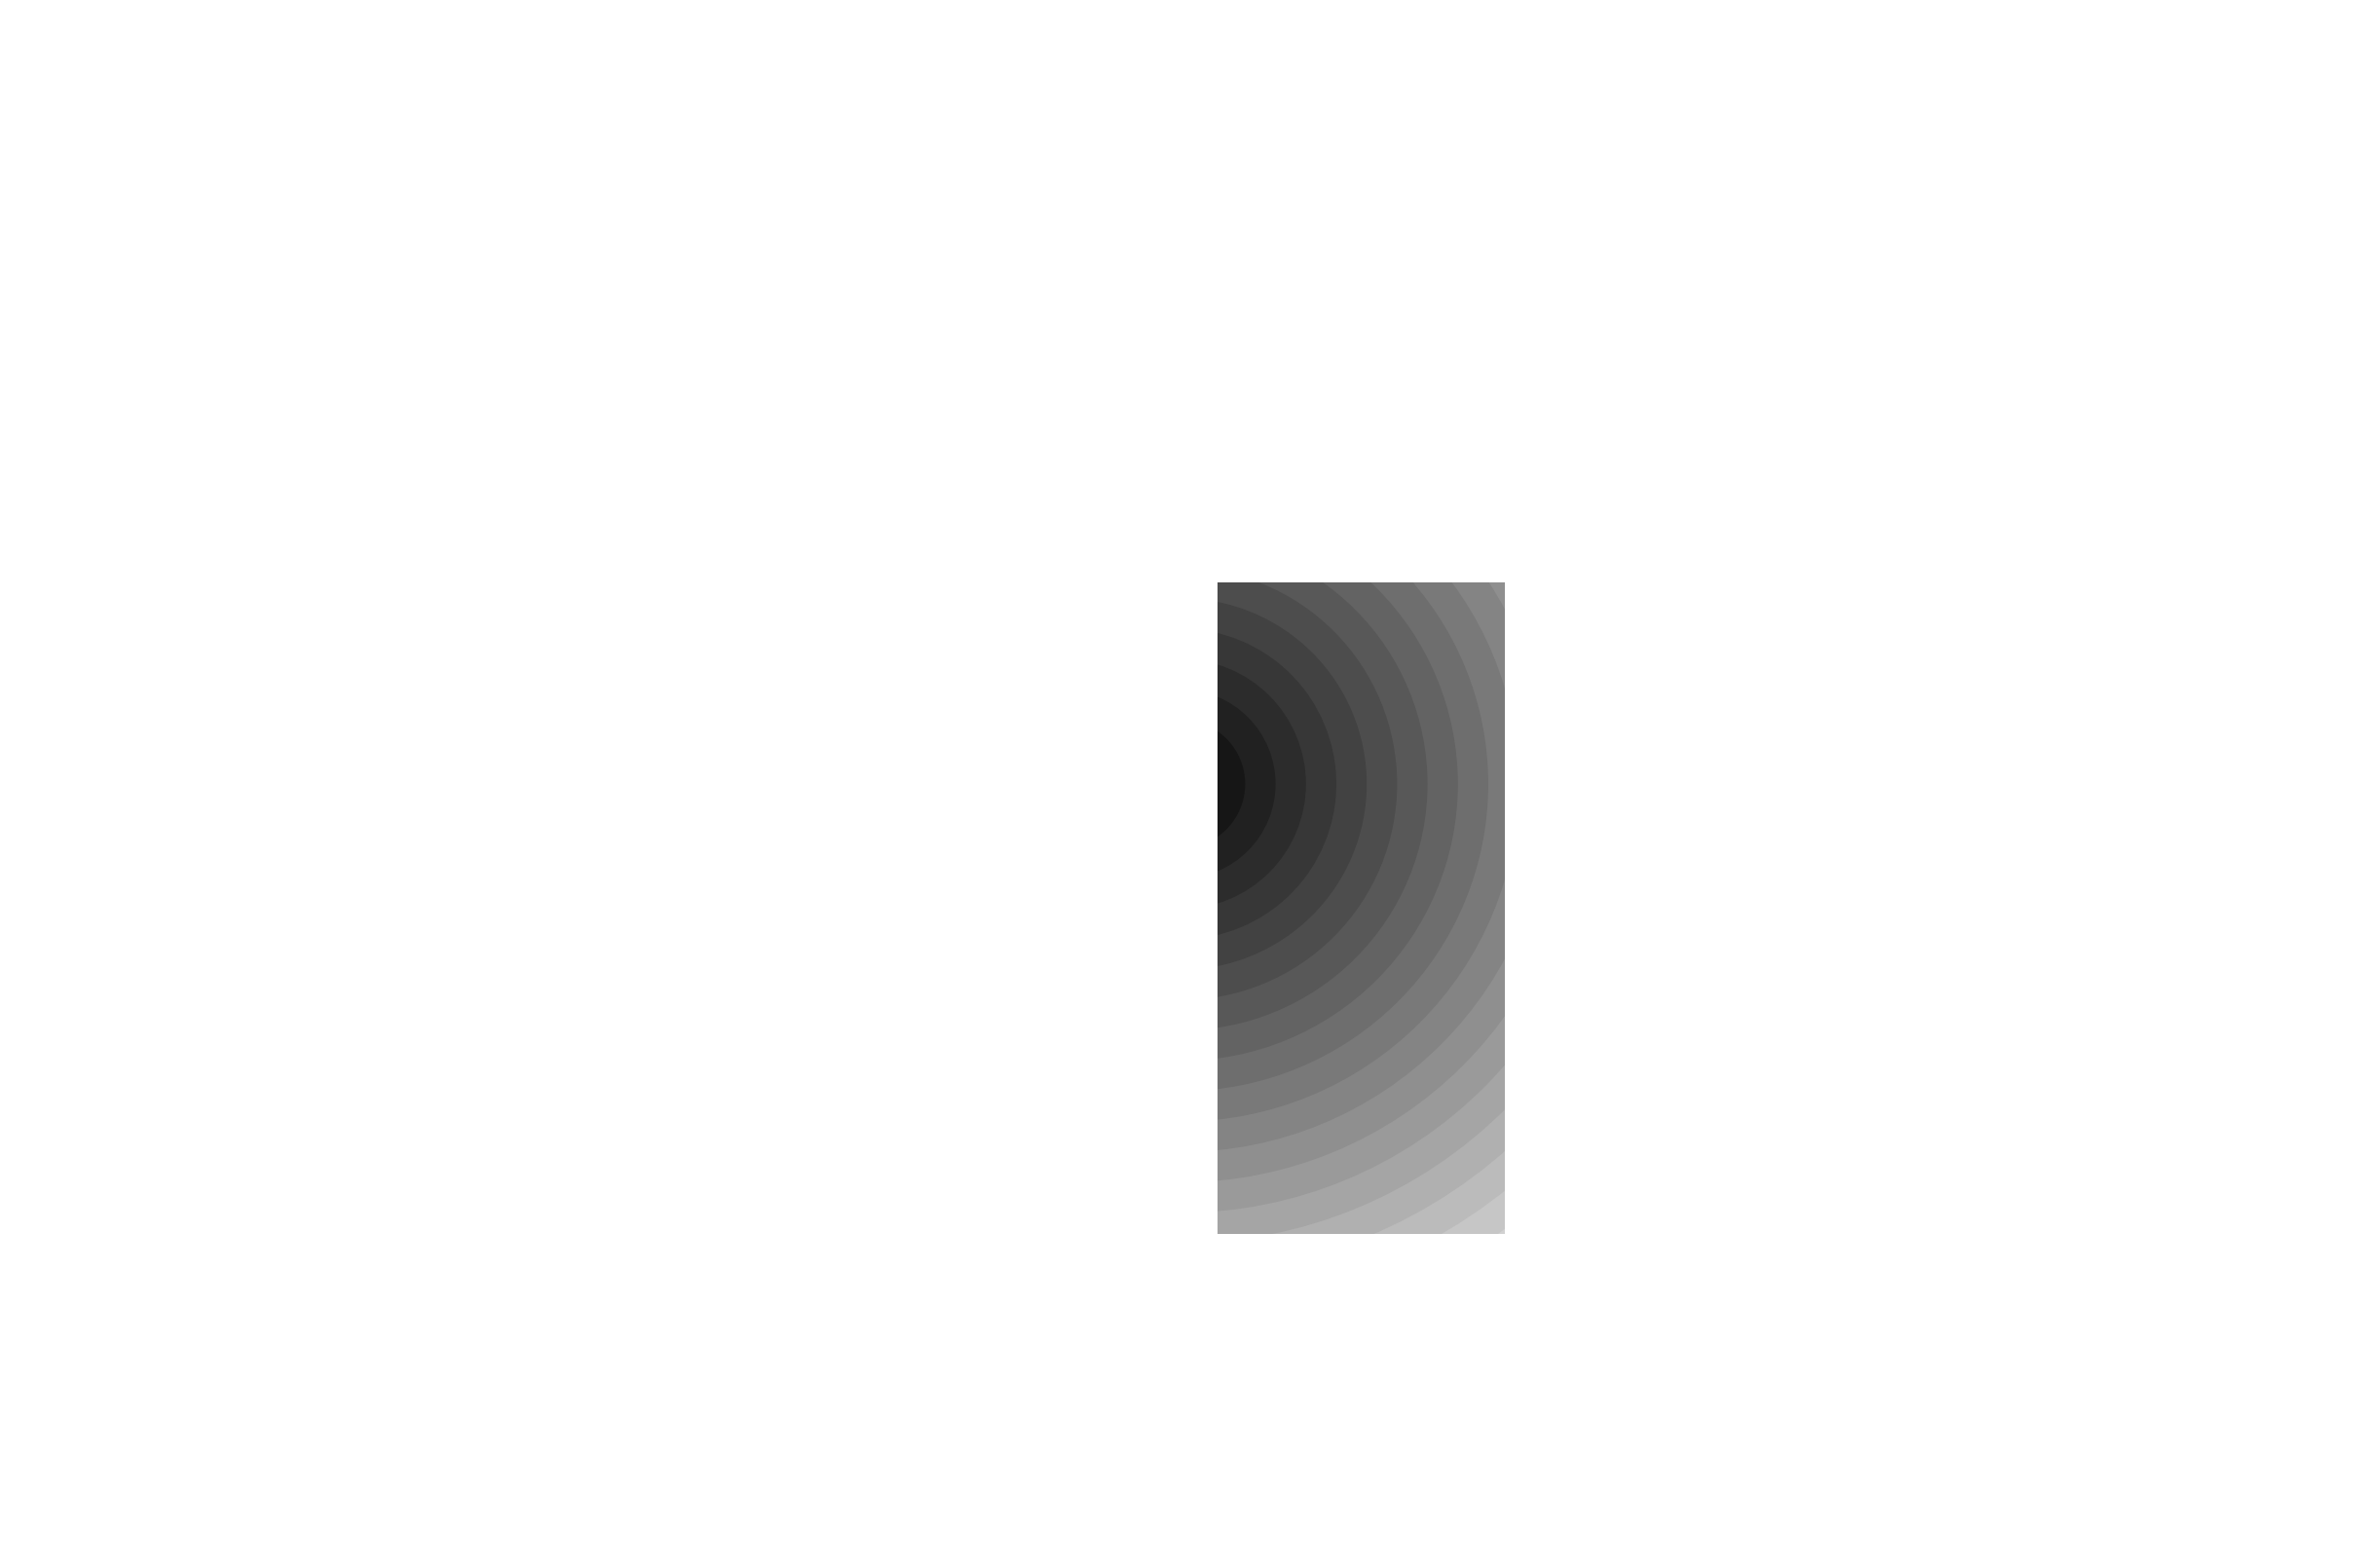

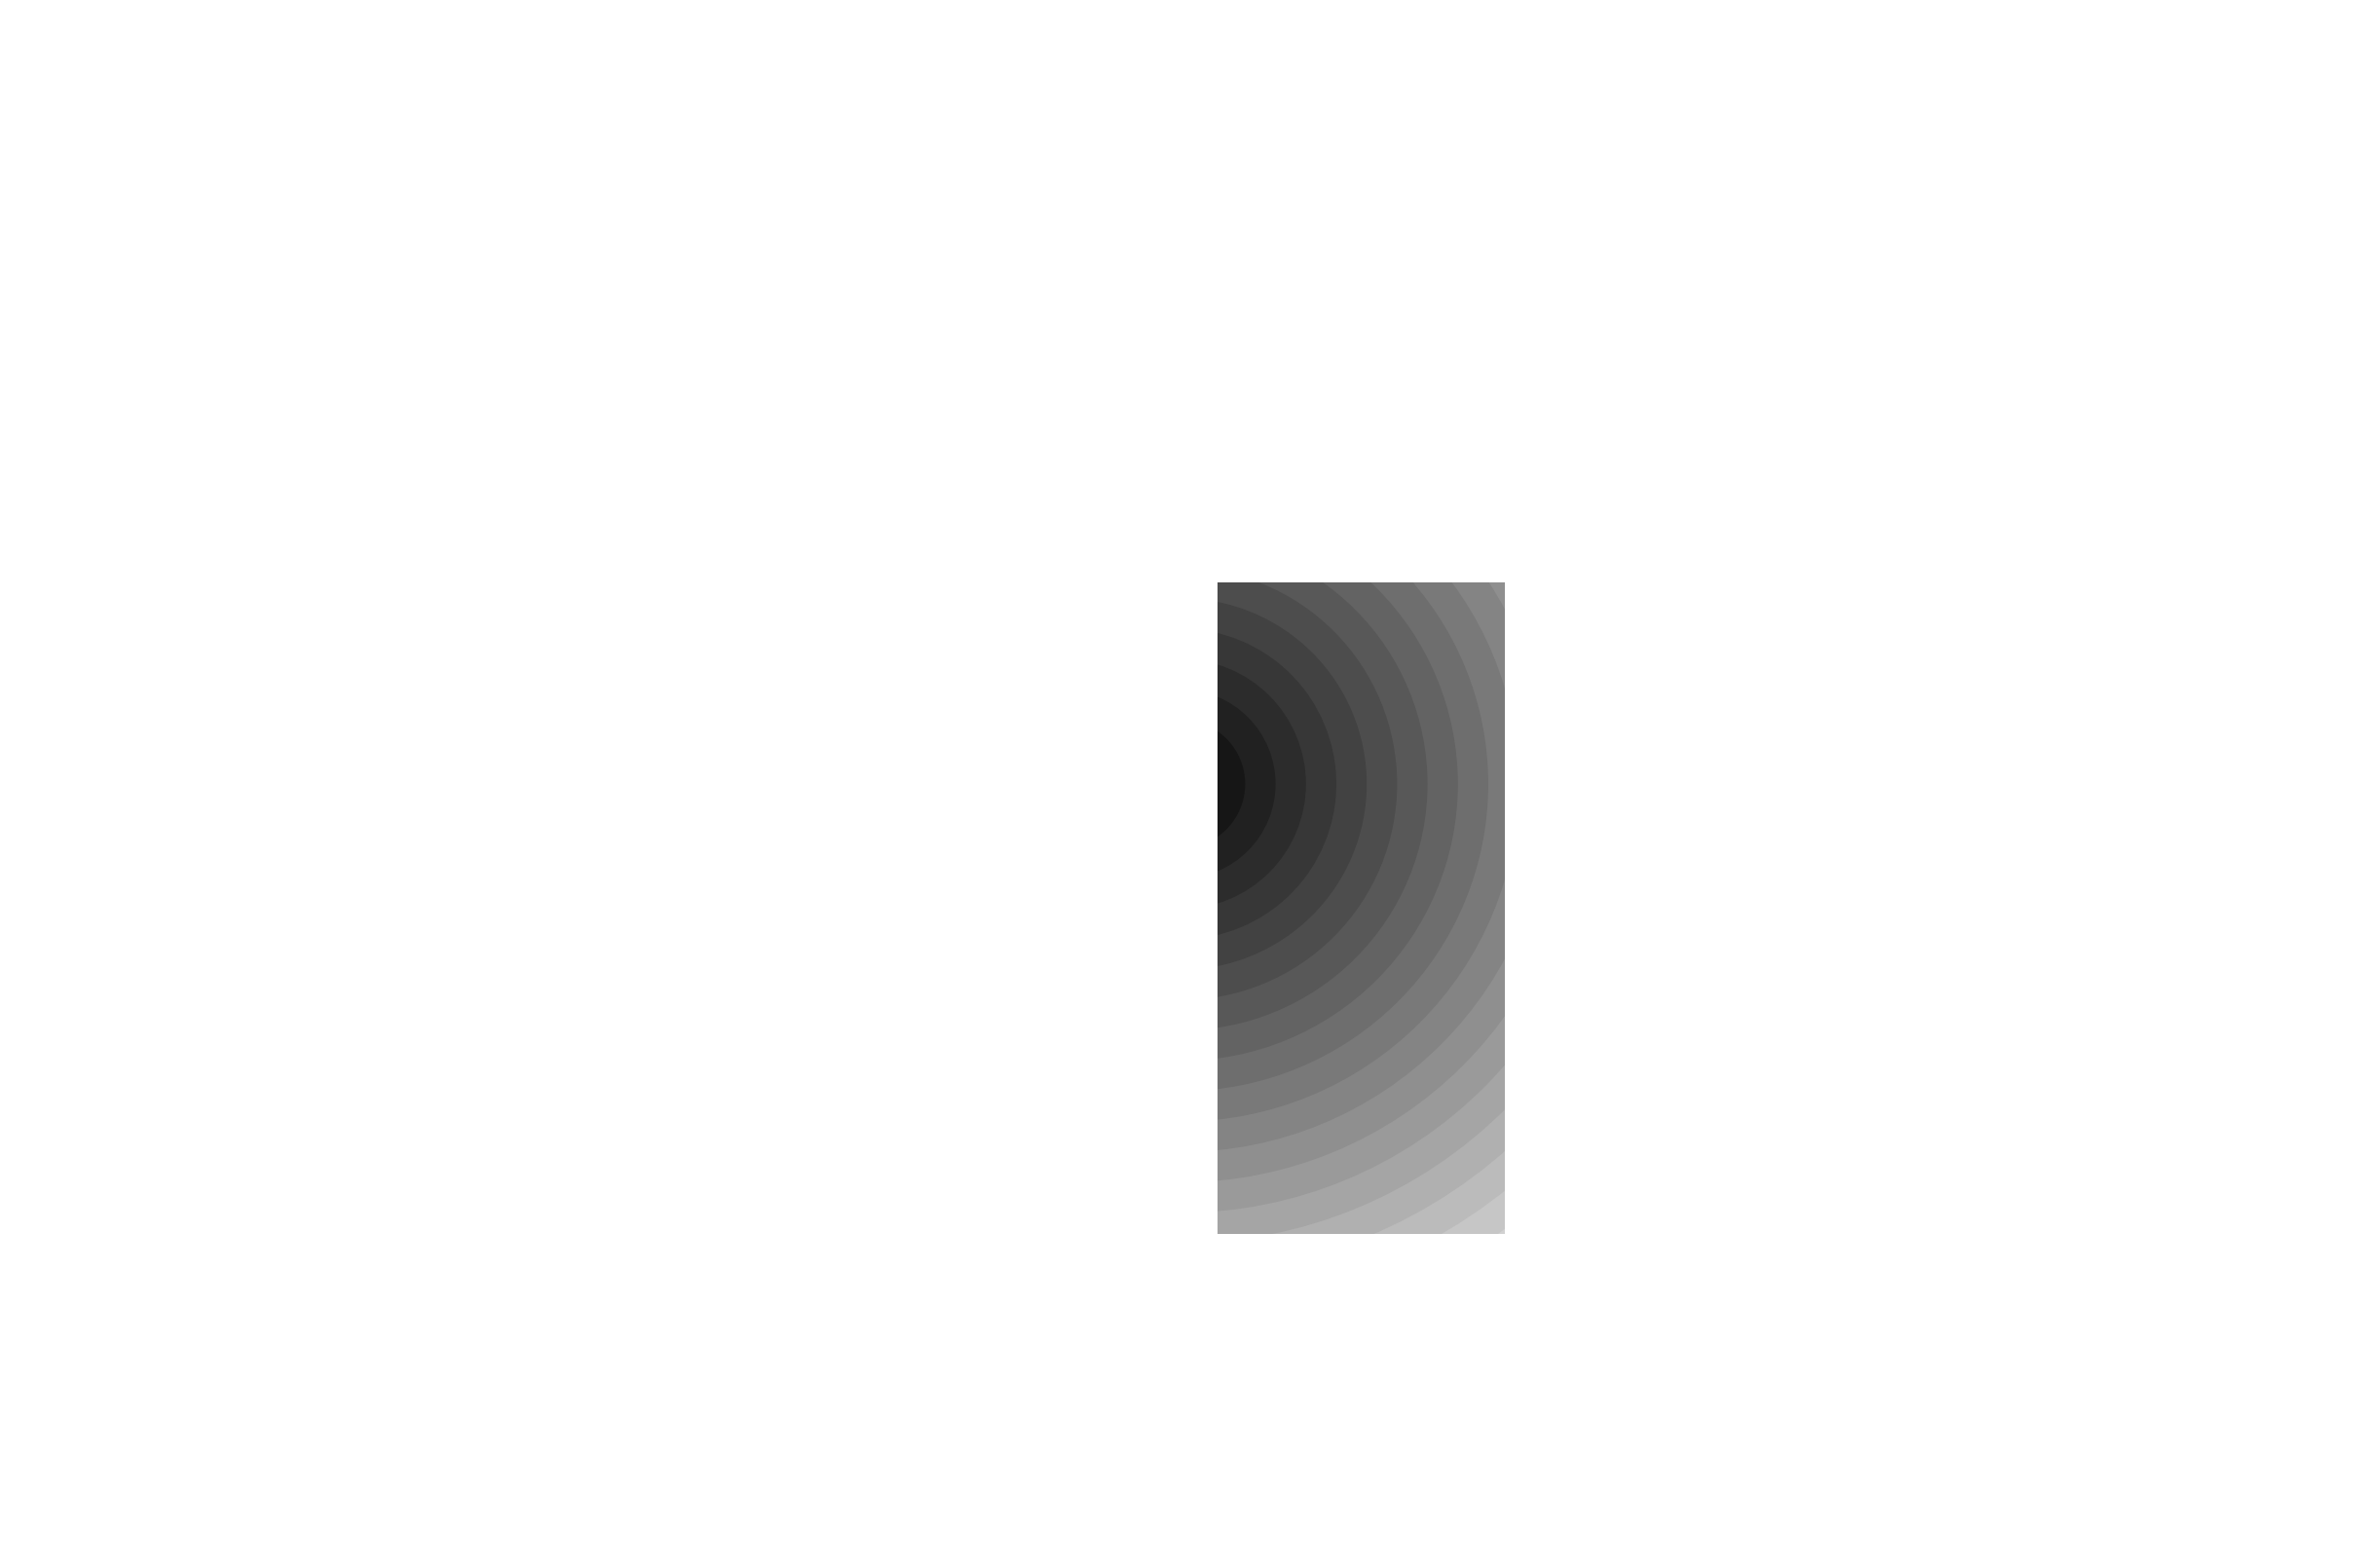

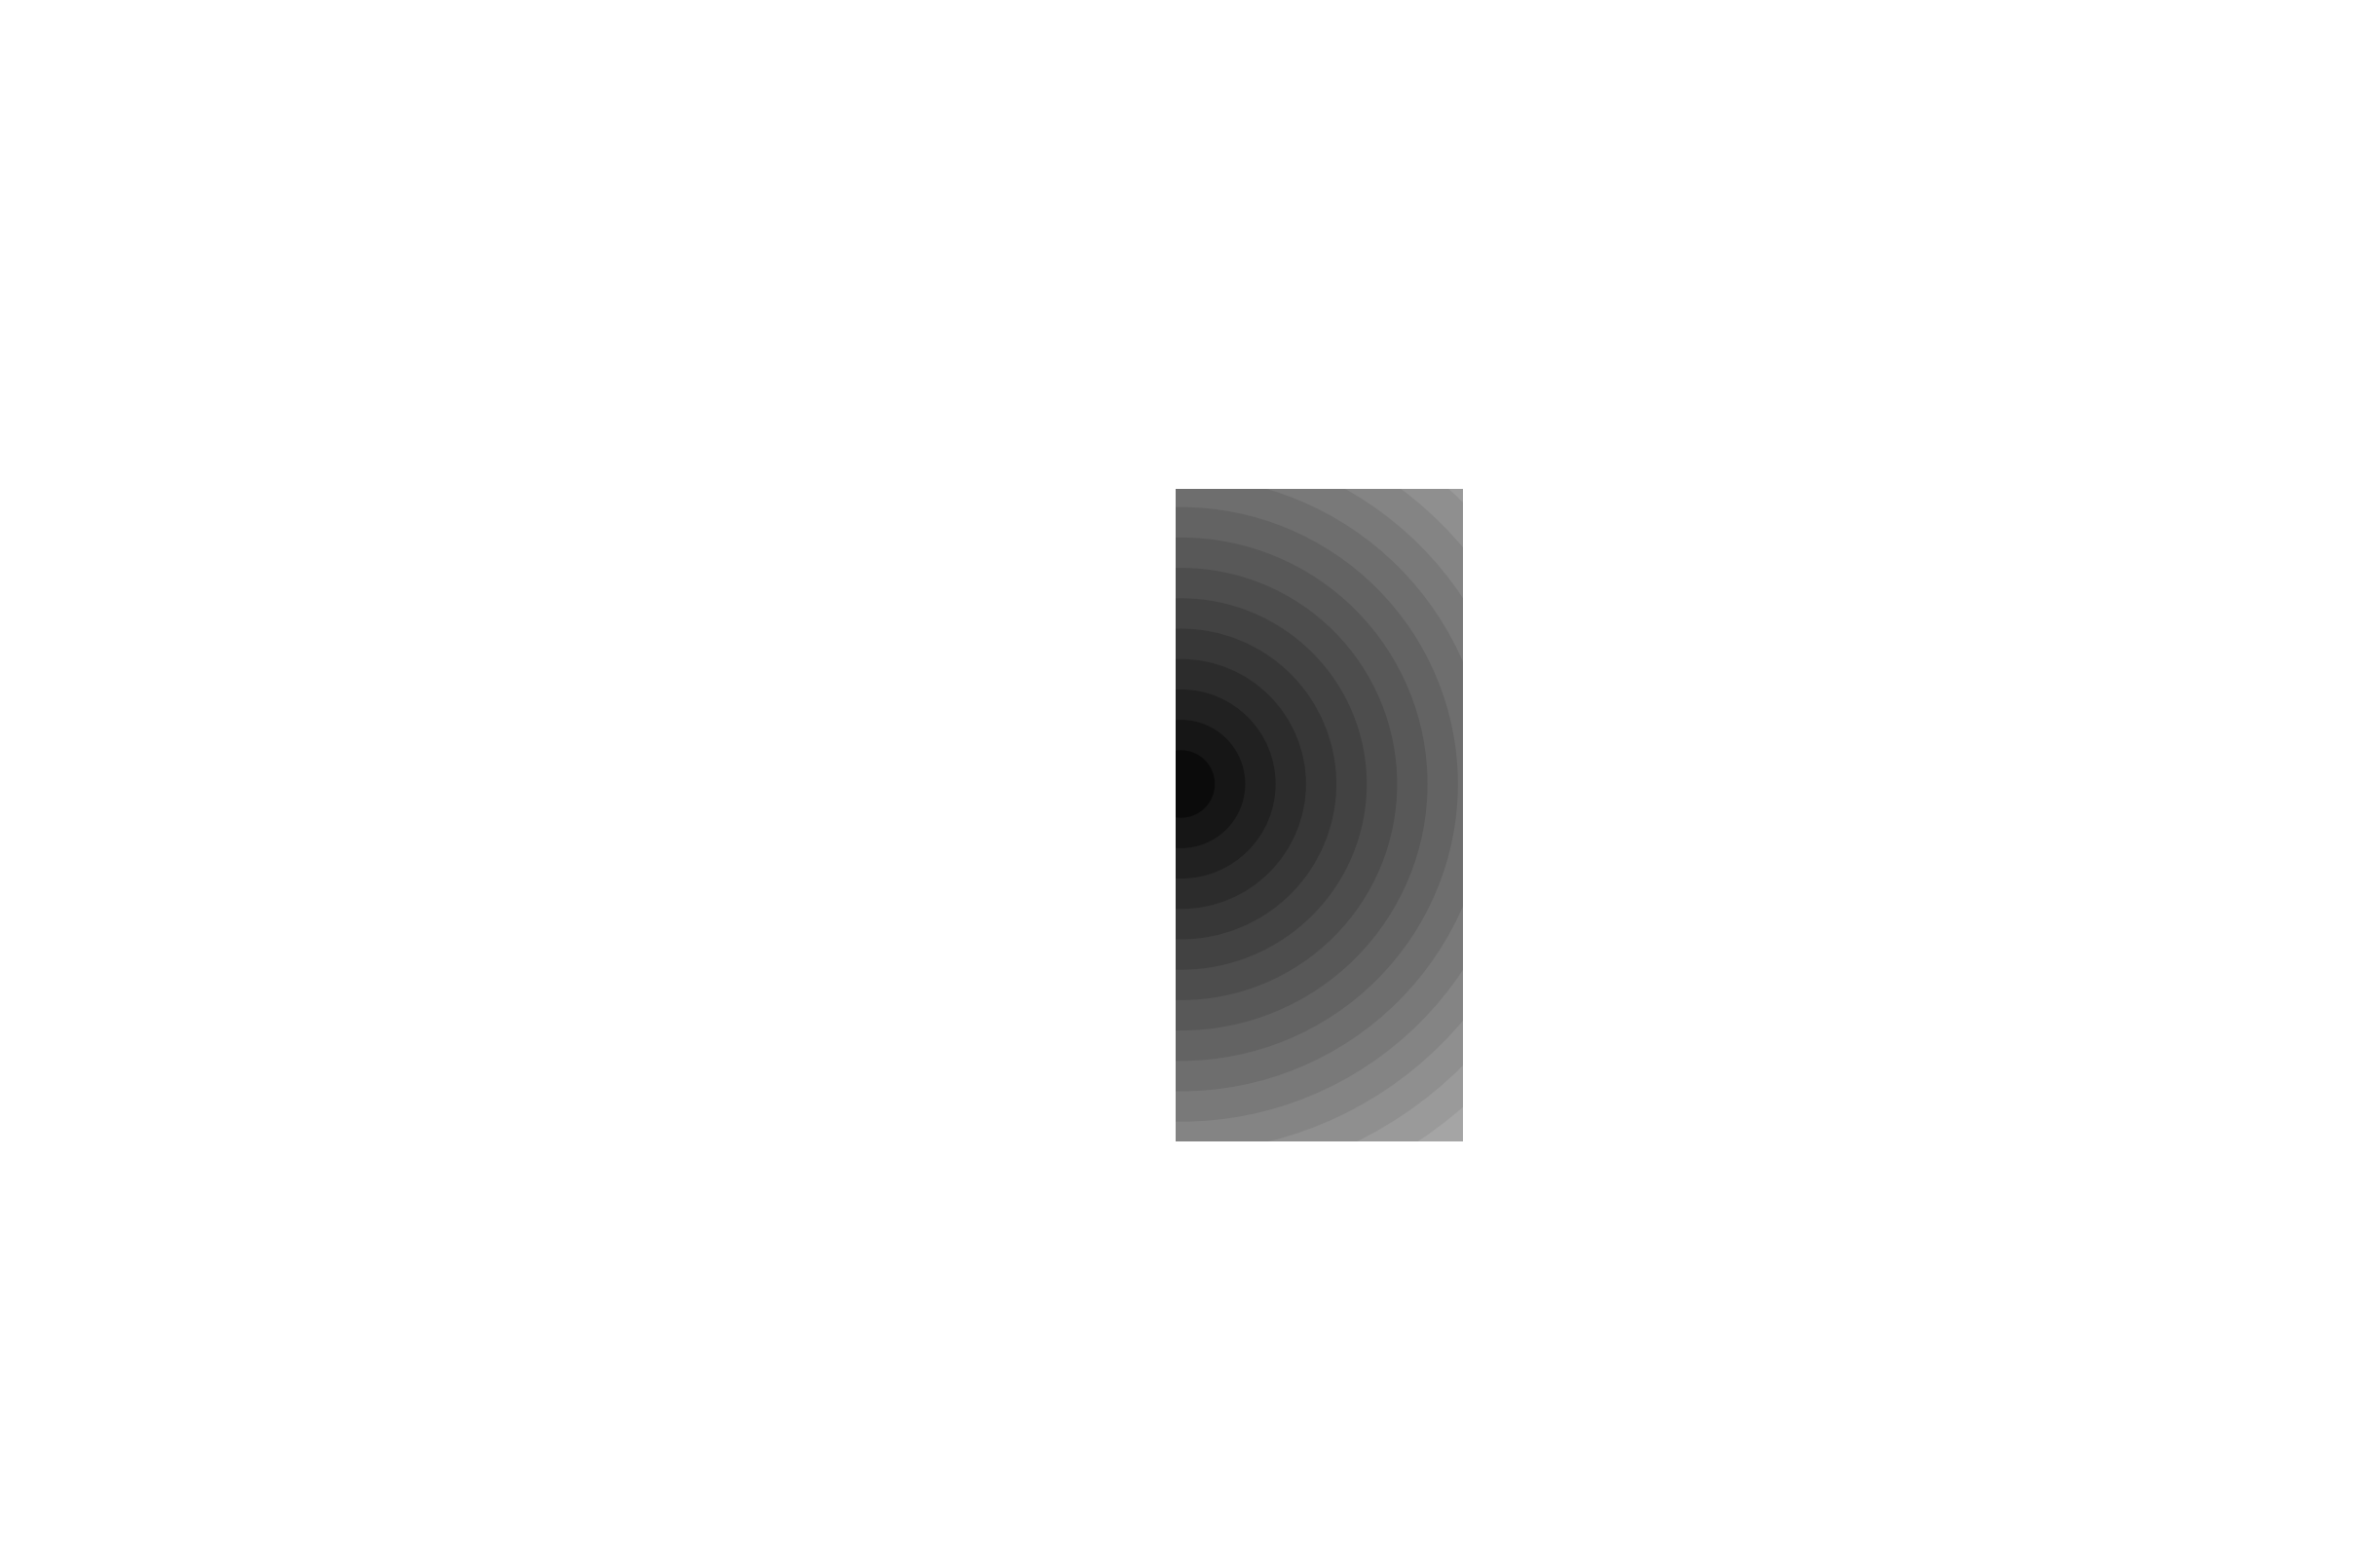

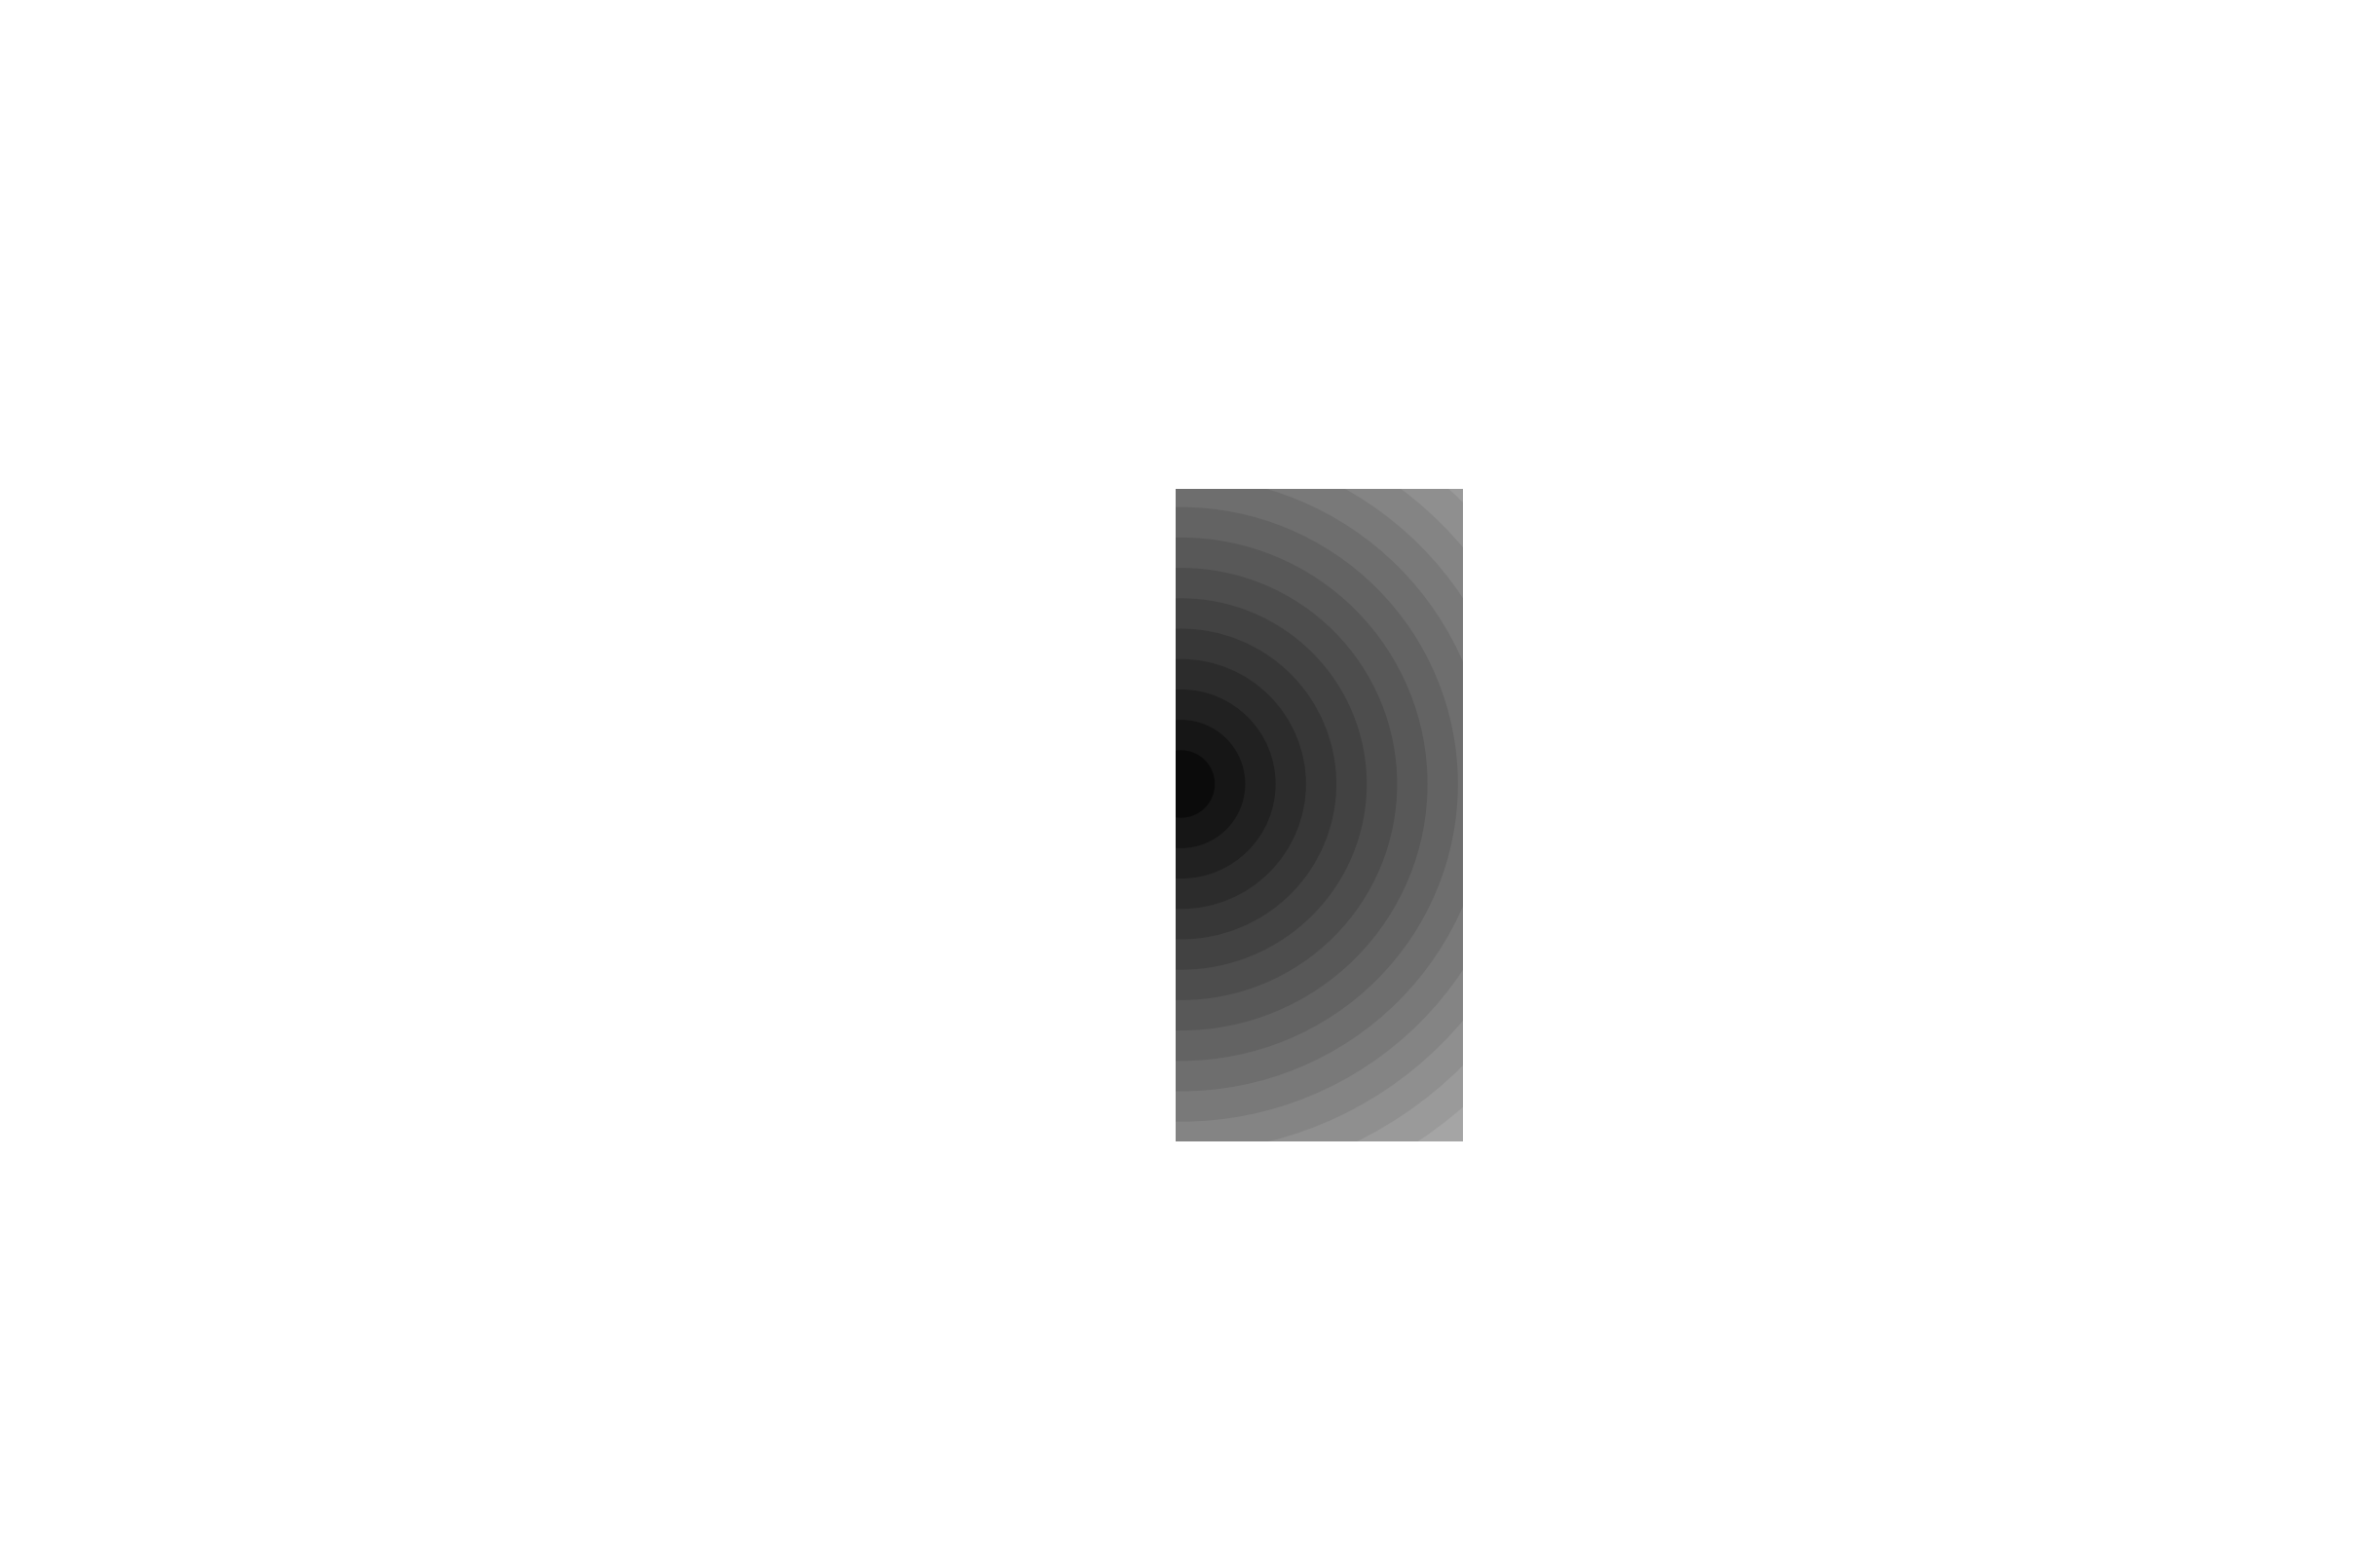

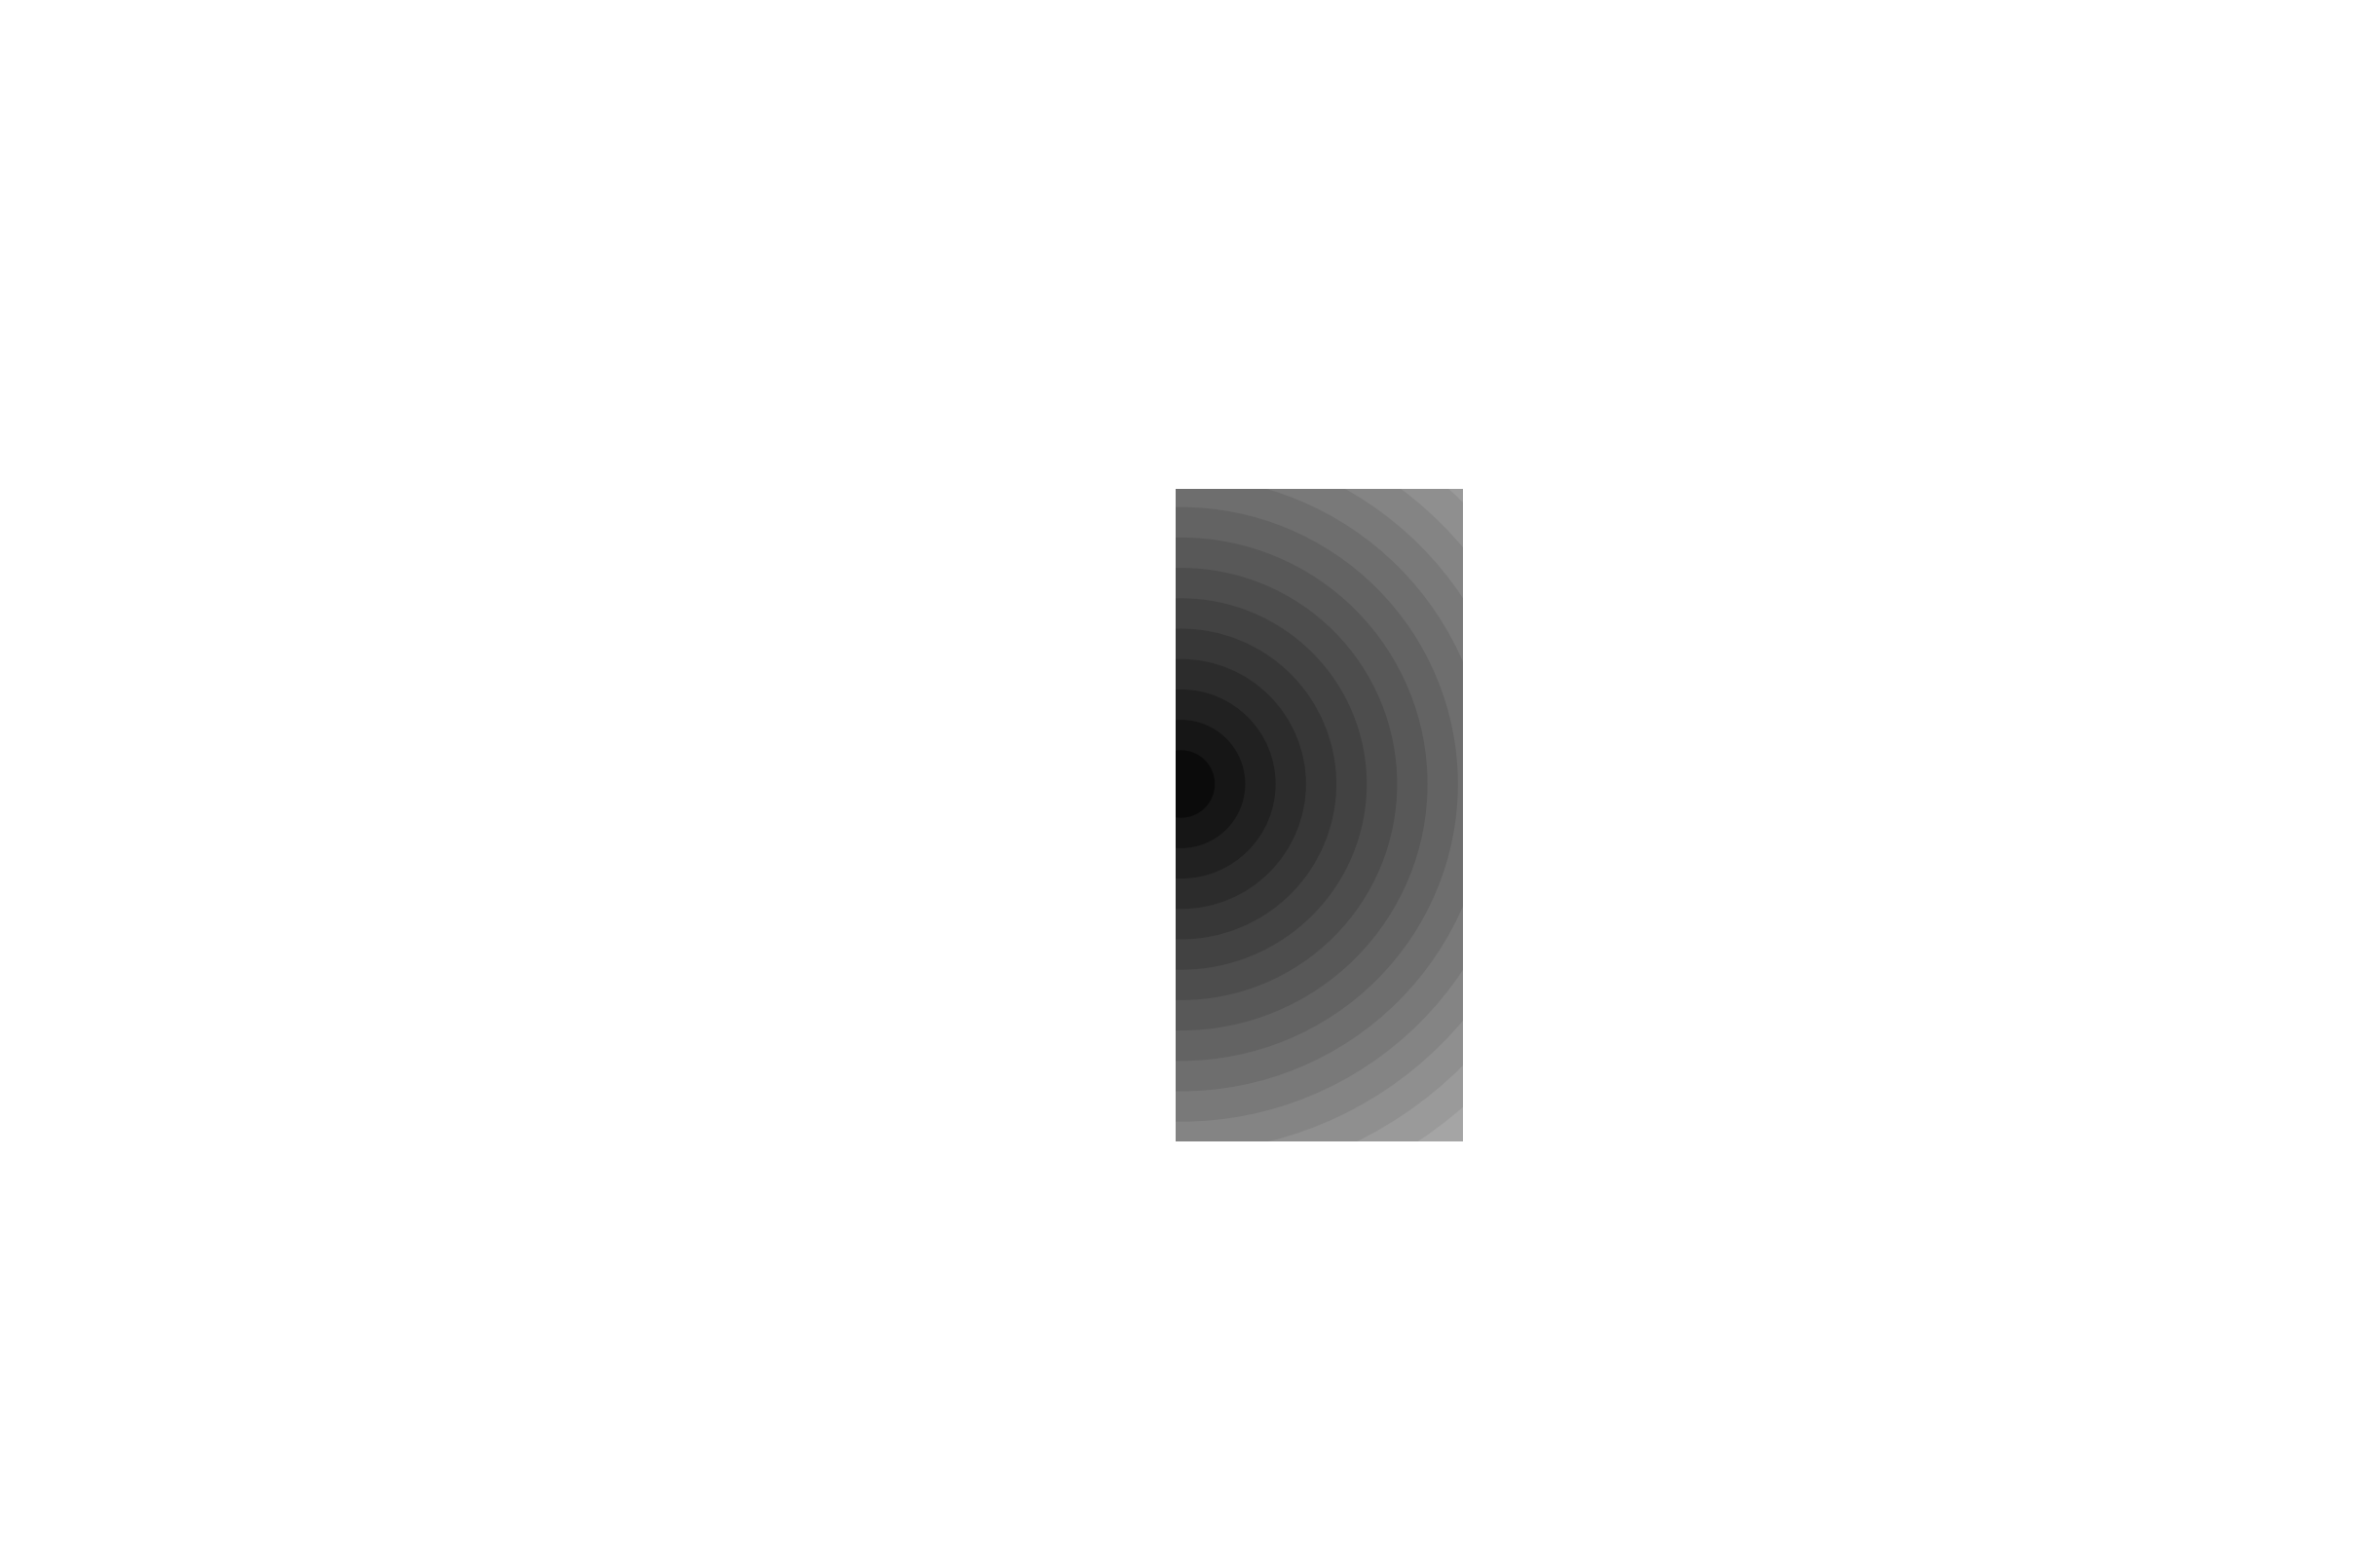

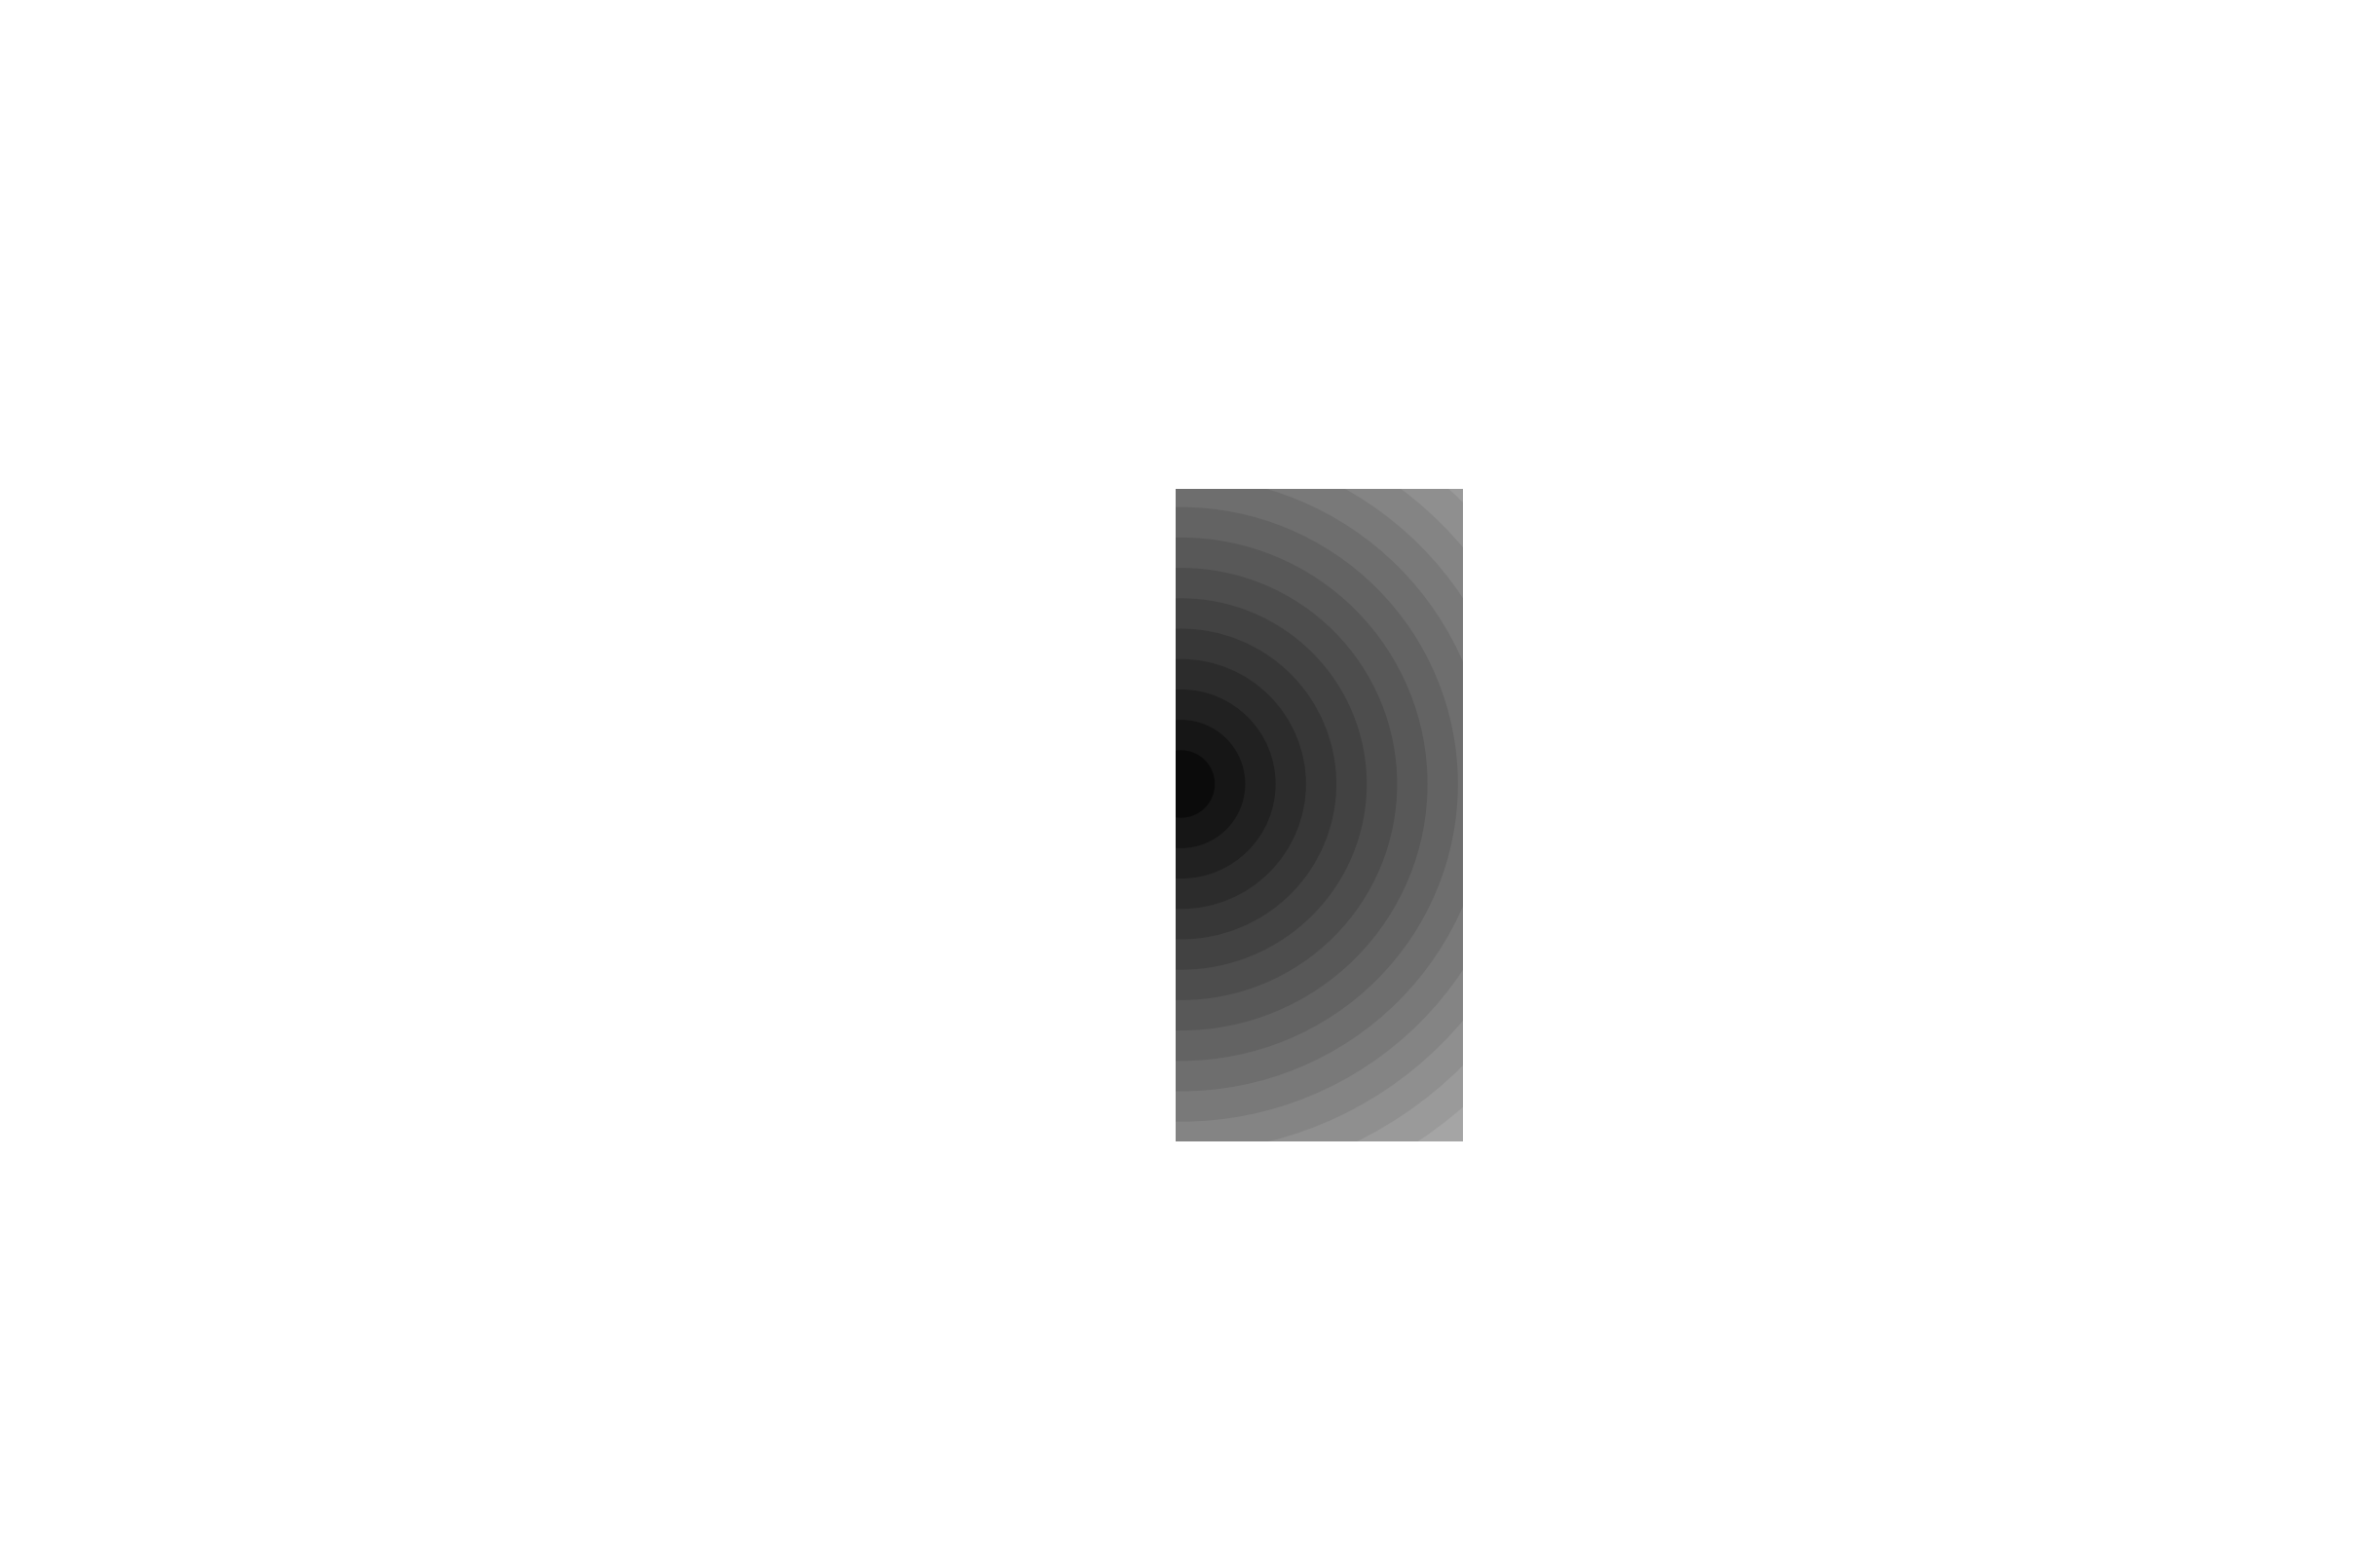

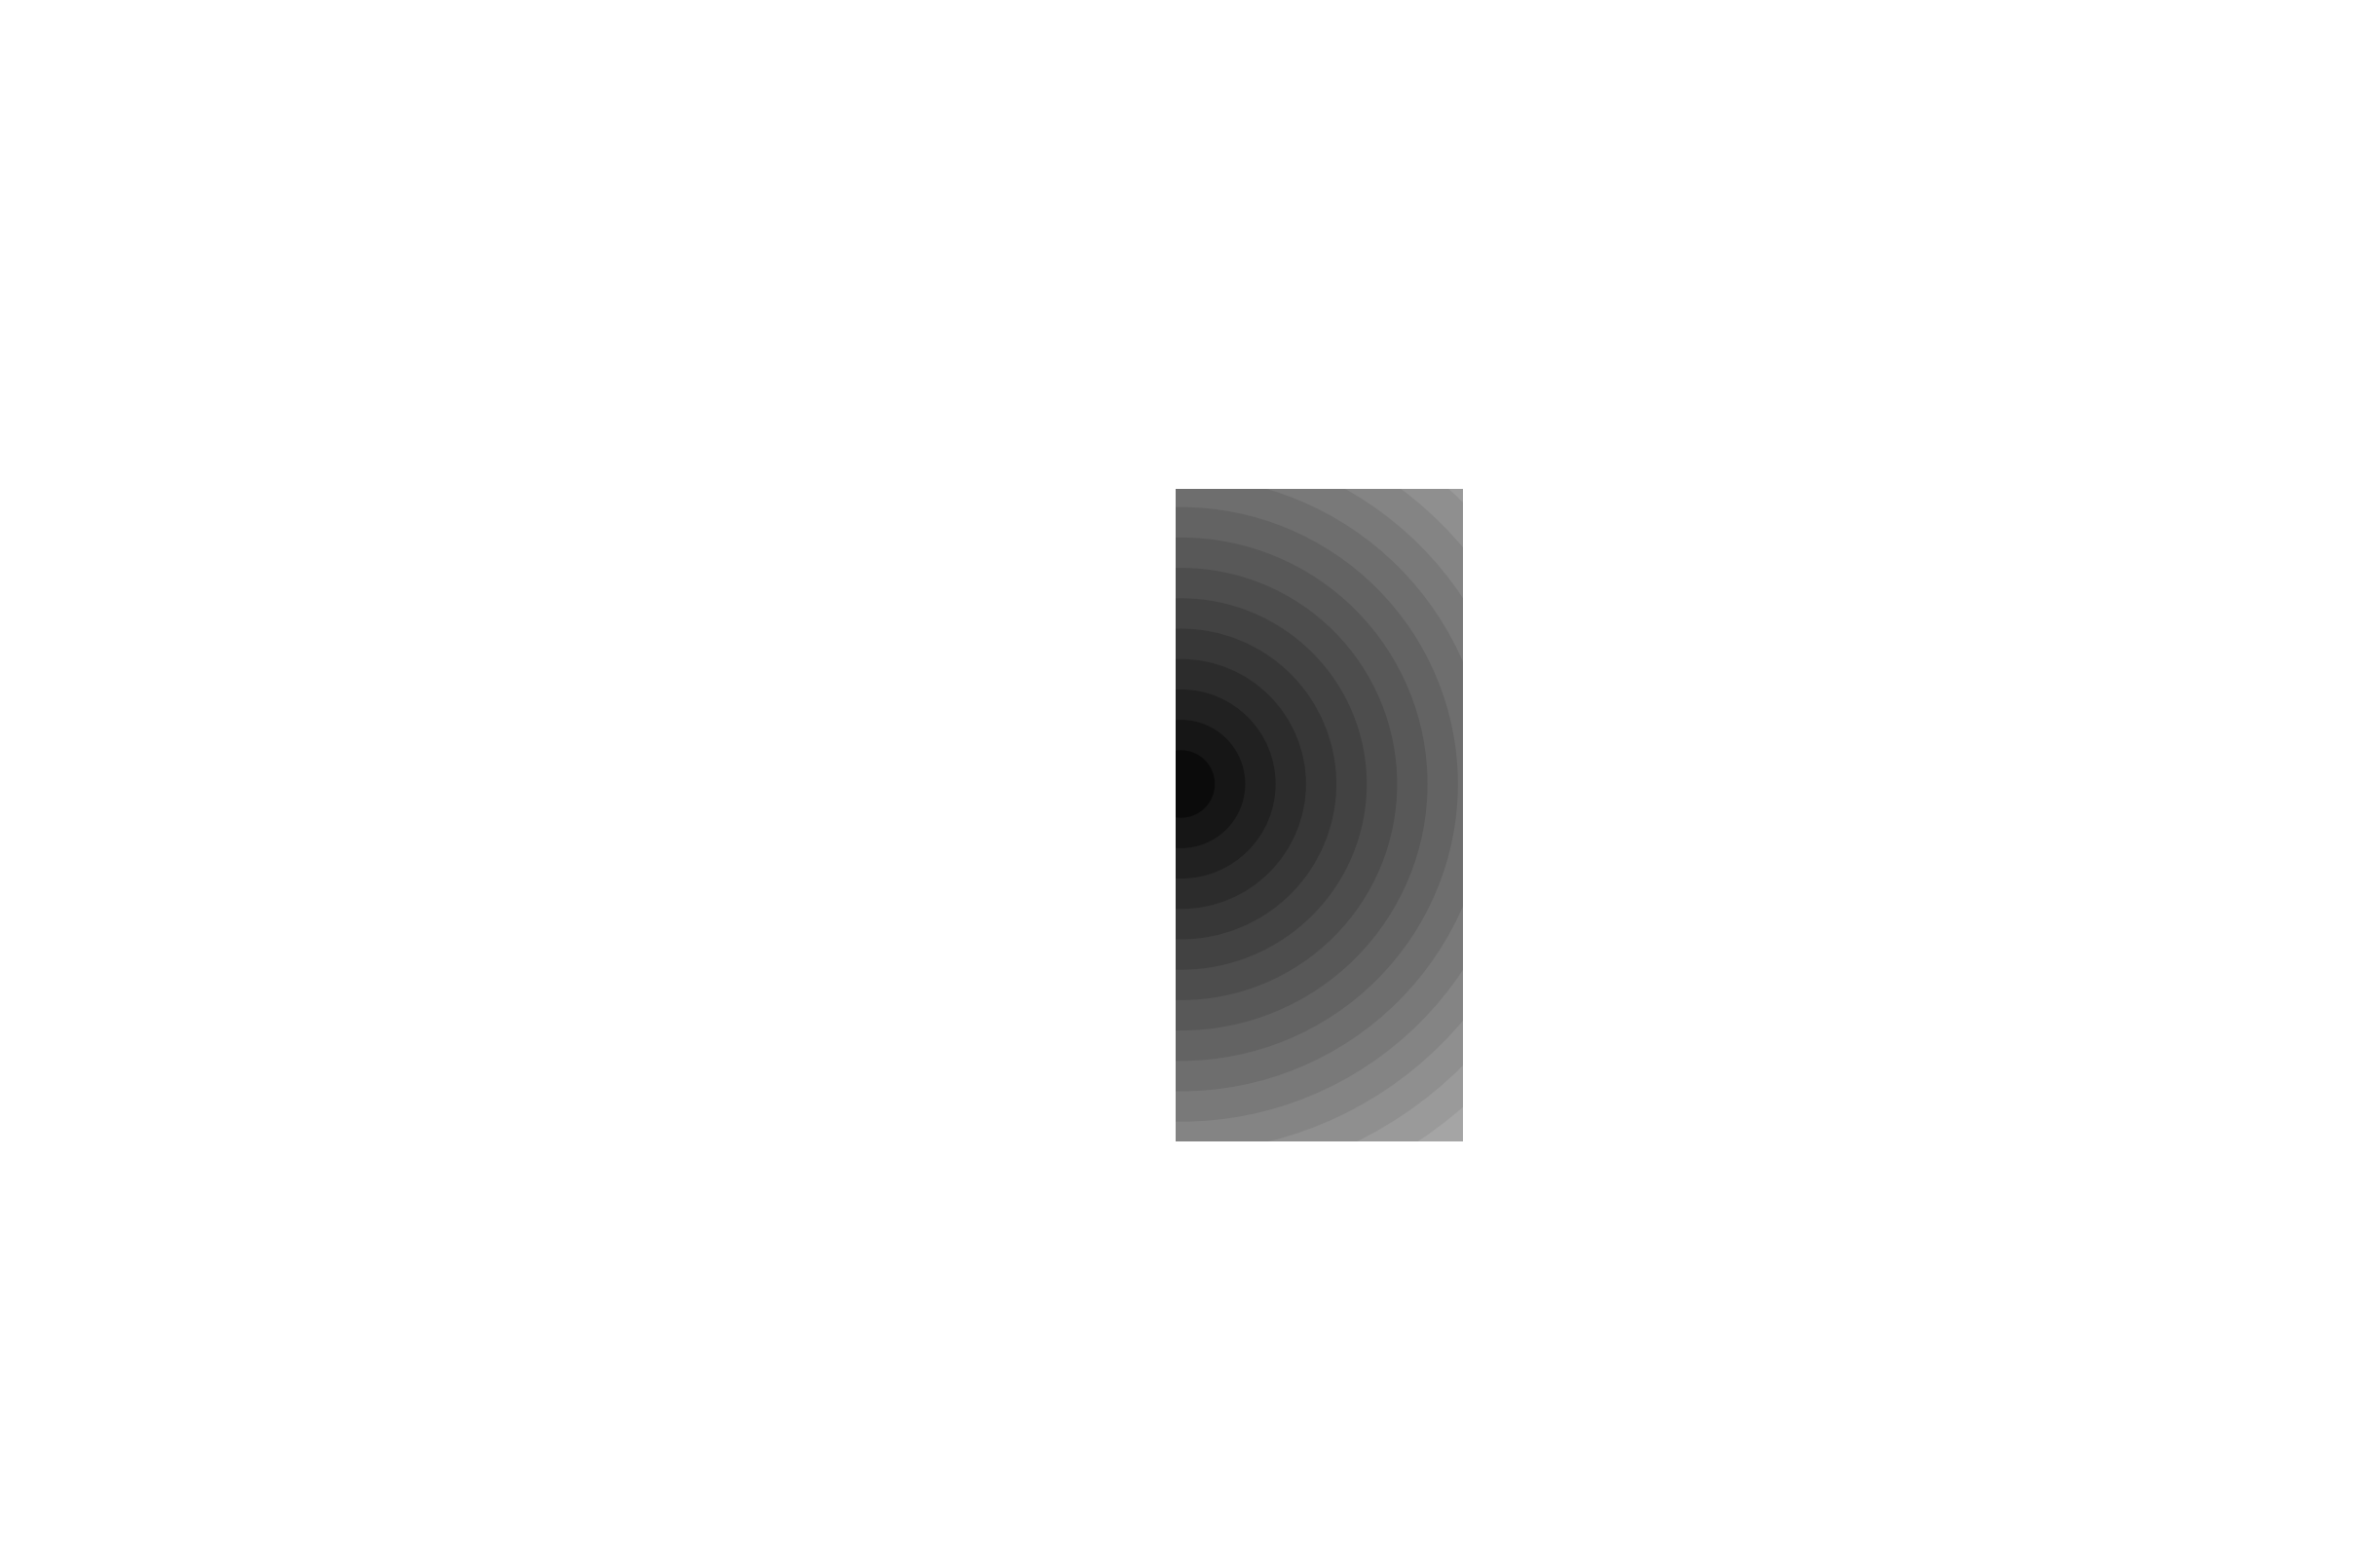

In [ ]:
## Histogram of weighted occupancy
rear_counts, hists, bins, visibility=rearing_distribution.get_normalized_rears(vestibular_perturbation, rearing_distance_beacon, session_no)

In [ ]:
summed_hists = np.sum(hists, axis=0)
plt.bar(np.arange(len(summed_hists)),summed_hists)